# Importing the required Libaries and other Functions

In [1]:
# PySpark API:
#http://spark.apache.org/docs/latest/api/python/index.html

import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName")
sc = SparkContext(conf=conf)
# initialise sc
#from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, HiveContext
from pyspark.sql.types import *
#sc= SparkContext()
sqlContext = SQLContext(sc)


# get python and spark versions
import platform
print(platform.python_version())
print(sc.version)

# import python sql libraries and other functions 
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *

# import python library for plotting data
import matplotlib.pyplot as plt
import gmplot

#import pandas and numpy
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import seaborn as sns

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when

spark = SparkSession.builder.appName("Big Data").config("spark.jars.packages", "graphframes:graphframes:0.6.0-spark2.3-s_2.11").enableHiveSupport().getOrCreate()

sqlContext = SQLContext(spark)
from pyspark.mllib.regression import LabeledPoint
from pyspark.ml.regression import LinearRegression

3.6.8
2.4.3


# New York Stock Exchange, Located in HDFS - /data/NYSE_daily

In [2]:
#load the data Located in HDFS - /data/NYSE_daily into NYstock_RDD

NYstock_RDD = sc.textFile("hdfs:///data/NYSE_daily")

In [3]:
#Return the first 5 rows

NYstock_RDD.take(5)

['NYSE\tCLI\t2009-12-31\t35.39\t35.70\t34.50\t34.57\t890100\t34.12',
 'NYSE\tCLI\t2009-12-30\t35.22\t35.46\t34.96\t35.40\t516900\t34.94',
 'NYSE\tCLI\t2009-12-29\t35.69\t35.95\t35.21\t35.34\t556500\t34.88',
 'NYSE\tCLI\t2009-12-28\t35.67\t36.23\t35.49\t35.69\t565000\t35.23',
 'NYSE\tCLI\t2009-12-24\t35.38\t35.60\t35.19\t35.47\t230200\t35.01']

## Data Cleansing and Preprocessing

### Define Header

In [4]:
#Split data to create list of a list to enable easy header assignment

NYstock_RDD_split = NYstock_RDD.map(lambda line: line.split('\t'))

In [5]:
NYstock_RDD_split.first()

['NYSE',
 'CLI',
 '2009-12-31',
 '35.39',
 '35.70',
 '34.50',
 '34.57',
 '890100',
 '34.12']

### Create Dataframe

In [6]:
#Create Dataframe 'NYstock_Df' from the list created

NYstock_Df = sqlContext.createDataFrame(NYstock_RDD_split)

In [7]:
NYstock_Df.show()

+----+---+----------+-----+-----+-----+-----+-------+-----+
|  _1| _2|        _3|   _4|   _5|   _6|   _7|     _8|   _9|
+----+---+----------+-----+-----+-----+-----+-------+-----+
|NYSE|CLI|2009-12-31|35.39|35.70|34.50|34.57| 890100|34.12|
|NYSE|CLI|2009-12-30|35.22|35.46|34.96|35.40| 516900|34.94|
|NYSE|CLI|2009-12-29|35.69|35.95|35.21|35.34| 556500|34.88|
|NYSE|CLI|2009-12-28|35.67|36.23|35.49|35.69| 565000|35.23|
|NYSE|CLI|2009-12-24|35.38|35.60|35.19|35.47| 230200|35.01|
|NYSE|CLI|2009-12-23|35.13|35.51|35.07|35.21| 520200|34.75|
|NYSE|CLI|2009-12-22|34.76|35.04|34.71|35.04| 564600|34.58|
|NYSE|CLI|2009-12-21|34.65|34.74|34.41|34.73| 428400|34.28|
|NYSE|CLI|2009-12-18|34.11|34.38|33.73|34.22|1152600|33.77|
|NYSE|CLI|2009-12-17|34.18|34.53|33.84|34.21|1082600|33.76|
|NYSE|CLI|2009-12-16|34.79|35.10|34.48|34.66|1007900|34.21|
|NYSE|CLI|2009-12-15|34.60|34.91|34.39|34.84| 813200|34.39|
|NYSE|CLI|2009-12-14|34.21|34.90|33.86|34.82| 987700|34.37|
|NYSE|CLI|2009-12-11|33.55|34.08|33.40|3

In [8]:
#check datatypes of the header

NYstock_Df.dtypes

[('_1', 'string'),
 ('_2', 'string'),
 ('_3', 'string'),
 ('_4', 'string'),
 ('_5', 'string'),
 ('_6', 'string'),
 ('_7', 'string'),
 ('_8', 'string'),
 ('_9', 'string')]

In [9]:
#Convert datatype from string to float type

NYstock_Df1 = NYstock_Df.withColumn("_4",NYstock_Df["_4"].cast(FloatType()))
NYstock_Df2 = NYstock_Df1.withColumn("_5",NYstock_Df1["_5"].cast(FloatType()))
NYstock_Df3 = NYstock_Df2.withColumn("_6",NYstock_Df2["_6"].cast(FloatType()))
NYstock_Df4 = NYstock_Df3.withColumn("_7",NYstock_Df3["_7"].cast(FloatType()))
NYstock_Df5 = NYstock_Df4.withColumn("_8",NYstock_Df4["_8"].cast(IntegerType()))
NYstock_Df6 = NYstock_Df5.withColumn("_9",NYstock_Df5["_9"].cast(FloatType()))

In [10]:
NYstock_Df6.printSchema()

root
 |-- _1: string (nullable = true)
 |-- _2: string (nullable = true)
 |-- _3: string (nullable = true)
 |-- _4: float (nullable = true)
 |-- _5: float (nullable = true)
 |-- _6: float (nullable = true)
 |-- _7: float (nullable = true)
 |-- _8: integer (nullable = true)
 |-- _9: float (nullable = true)



### Output to Pandas for futher analysis

In [11]:
# Identifiy missing values
pdNull = NYstock_Df6.toPandas()

pdNull.isnull()

,_1,_2,_3,_4,_5,_6,_7,_8,_9
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
57386,False,False,False,False,False,False,False,False,False
57387,False,False,False,False,False,False,False,False,False
57388,False,False,False,False,False,False,False,False,False
57389,False,False,False,False,False,False,False,False,False


In [12]:
#check for missing values
pdNull.isnull().sum()

_1    0
_2    0
_3    0
_4    0
_5    0
_6    0
_7    0
_8    0
_9    0
dtype: int64

In [13]:
#Convert the spark dataframe to pandas dataframe

PdNYstock=NYstock_Df6.toPandas()

PdNYstock

,_1,_2,_3,_4,_5,_6,_7,_8,_9
0,NYSE,CLI,2009-12-31,35.389999,35.700001,34.500000,34.570000,890100,34.119999
1,NYSE,CLI,2009-12-30,35.220001,35.459999,34.959999,35.400002,516900,34.939999
2,NYSE,CLI,2009-12-29,35.689999,35.950001,35.209999,35.340000,556500,34.880001
3,NYSE,CLI,2009-12-28,35.669998,36.230000,35.490002,35.689999,565000,35.230000
4,NYSE,CLI,2009-12-24,35.380001,35.599998,35.189999,35.470001,230200,35.009998
...,...,...,...,...,...,...,...,...,...
57386,NYSE,CVA,2009-01-08,21.080000,21.250000,20.430000,20.809999,1633700,20.809999
57387,NYSE,CVA,2009-01-07,22.340000,22.500000,21.219999,21.320000,1169500,21.320000
57388,NYSE,CVA,2009-01-06,22.850000,22.920000,22.250000,22.500000,1058700,22.500000
57389,NYSE,CVA,2009-01-05,21.790001,22.889999,21.490000,22.680000,981100,22.680000


In [14]:
# Append header to the table

PdNYstock.columns = ['EXCHANGE', 'SYMBOL', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME', 'ADJ_CLOSE']

PdNYstock

,EXCHANGE,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,NYSE,CLI,2009-12-31,35.389999,35.700001,34.500000,34.570000,890100,34.119999
1,NYSE,CLI,2009-12-30,35.220001,35.459999,34.959999,35.400002,516900,34.939999
2,NYSE,CLI,2009-12-29,35.689999,35.950001,35.209999,35.340000,556500,34.880001
3,NYSE,CLI,2009-12-28,35.669998,36.230000,35.490002,35.689999,565000,35.230000
4,NYSE,CLI,2009-12-24,35.380001,35.599998,35.189999,35.470001,230200,35.009998
...,...,...,...,...,...,...,...,...,...
57386,NYSE,CVA,2009-01-08,21.080000,21.250000,20.430000,20.809999,1633700,20.809999
57387,NYSE,CVA,2009-01-07,22.340000,22.500000,21.219999,21.320000,1169500,21.320000
57388,NYSE,CVA,2009-01-06,22.850000,22.920000,22.250000,22.500000,1058700,22.500000
57389,NYSE,CVA,2009-01-05,21.790001,22.889999,21.490000,22.680000,981100,22.680000


In [15]:
#Analyse the year with the most trading activities
PdNYstock.groupby("DATE").size().reset_index(name='COUNT')

,DATE,COUNT
0,1981-06-25,1
1,1982-04-30,1
2,1984-01-19,1
3,1984-07-23,1
4,1987-03-09,1
...,...,...
356,2009-12-28,236
357,2009-12-29,237
358,2009-12-30,237
359,2009-12-31,236


In [16]:
# convert the pandas dataframe back to Spark dataframe
NewYorkstock_DF = spark.createDataFrame(PdNYstock)

NewYorkstock_DF.show()

+--------+------+----------+------------------+------------------+------------------+------------------+-------+------------------+
|EXCHANGE|SYMBOL|      DATE|              OPEN|              HIGH|               LOW|             CLOSE| VOLUME|         ADJ_CLOSE|
+--------+------+----------+------------------+------------------+------------------+------------------+-------+------------------+
|    NYSE|   CLI|2009-12-31| 35.38999938964844| 35.70000076293945|              34.5| 34.56999969482422| 890100|34.119998931884766|
|    NYSE|   CLI|2009-12-30|35.220001220703125|35.459999084472656|34.959999084472656|35.400001525878906| 516900|34.939998626708984|
|    NYSE|   CLI|2009-12-29|35.689998626708984| 35.95000076293945|35.209999084472656| 35.34000015258789| 556500|34.880001068115234|
|    NYSE|   CLI|2009-12-28| 35.66999816894531| 36.22999954223633|  35.4900016784668|35.689998626708984| 565000| 35.22999954223633|
|    NYSE|   CLI|2009-12-24|35.380001068115234|35.599998474121094|35.1899986

In [17]:
# Rounding up to 2 decimal places

NewYorkstock_DF = NewYorkstock_DF.withColumn("OPEN",round(NewYorkstock_DF["OPEN"], 2))
NewYorkstock_DF = NewYorkstock_DF.withColumn("HIGH",round(NewYorkstock_DF["HIGH"], 2))
NewYorkstock_DF = NewYorkstock_DF.withColumn("LOW",round(NewYorkstock_DF["LOW"], 2))
NewYorkstock_DF = NewYorkstock_DF.withColumn("CLOSE",round(NewYorkstock_DF["CLOSE"], 2))
NewYorkstock_DF = NewYorkstock_DF.withColumn("VOLUME",round(NewYorkstock_DF["VOLUME"], 2))
NewYorkstock_DF1 = NewYorkstock_DF.withColumn("ADJ_CLOSE",round(NewYorkstock_DF["ADJ_CLOSE"], 2))

In [18]:
NewYorkstock_DF1.show()

+--------+------+----------+-----+-----+-----+-----+-------+---------+
|EXCHANGE|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE| VOLUME|ADJ_CLOSE|
+--------+------+----------+-----+-----+-----+-----+-------+---------+
|    NYSE|   CLI|2009-12-31|35.39| 35.7| 34.5|34.57| 890100|    34.12|
|    NYSE|   CLI|2009-12-30|35.22|35.46|34.96| 35.4| 516900|    34.94|
|    NYSE|   CLI|2009-12-29|35.69|35.95|35.21|35.34| 556500|    34.88|
|    NYSE|   CLI|2009-12-28|35.67|36.23|35.49|35.69| 565000|    35.23|
|    NYSE|   CLI|2009-12-24|35.38| 35.6|35.19|35.47| 230200|    35.01|
|    NYSE|   CLI|2009-12-23|35.13|35.51|35.07|35.21| 520200|    34.75|
|    NYSE|   CLI|2009-12-22|34.76|35.04|34.71|35.04| 564600|    34.58|
|    NYSE|   CLI|2009-12-21|34.65|34.74|34.41|34.73| 428400|    34.28|
|    NYSE|   CLI|2009-12-18|34.11|34.38|33.73|34.22|1152600|    33.77|
|    NYSE|   CLI|2009-12-17|34.18|34.53|33.84|34.21|1082600|    33.76|
|    NYSE|   CLI|2009-12-16|34.79| 35.1|34.48|34.66|1007900|    34.21|
|    N

# Data Analysis


In [19]:
#show the number of Trading observed for each year

Trading_Year = NewYorkstock_DF1.select(substring(NewYorkstock_DF1.DATE, 1,4).alias('YEAR'),\
                'DATE').groupby('YEAR').count().orderBy(desc('YEAR')).show(30)

+----+-----+
|YEAR|count|
+----+-----+
|2010|    1|
|2009|57283|
|2008|    9|
|2007|   10|
|2006|   15|
|2005|    6|
|2004|    6|
|2003|    5|
|2002|    6|
|2001|    9|
|2000|    3|
|1999|    6|
|1998|    5|
|1997|    4|
|1996|    1|
|1995|    4|
|1994|    1|
|1992|    1|
|1991|    2|
|1990|    4|
|1988|    4|
|1987|    2|
|1984|    2|
|1982|    1|
|1981|    1|
+----+-----+



## Register Temporary Table to run queries


In [20]:
#register the dataframe as a table

sqlContext.registerDataFrameAsTable(NewYorkstock_DF1, "NYS_Table")

In [21]:
#select distinct Trading companies to get the total number of companies that trade
#within the scope of the data set
sqlContext.sql("select distinct SYMBOL from NYS_Table").count()

237

In [22]:
#Explore the different Trading Companies and the number of times they traded 
#within the scope of the data set

CompanyType = sqlContext.sql("select SYMBOL, \
count(*) as count from NYS_Table group by SYMBOL").orderBy(desc('count')).show()

+------+-----+
|SYMBOL|count|
+------+-----+
|   CAT|  257|
|    CA|  257|
|    CI|  256|
|   CVX|  256|
|    CR|  256|
|   CAH|  255|
|    CY|  255|
|   CVC|  255|
|   CYN|  255|
|   CMS|  255|
|   CLI|  255|
|   CBB|  254|
|   CBM|  254|
|   CSX|  254|
|   CAG|  254|
|   CAL|  254|
|   COP|  254|
|   CFR|  254|
|   CLH|  254|
|   COT|  254|
+------+-----+
only showing top 20 rows



In [23]:
#Explore the different Trading Companies and the total Volume traded 
#within the scope of the data set

NYS_vol = sqlContext.sql("select distinct SYMBOL, \
sum(VOLUME) as Total_Volume from NYS_Table group by SYMBOL").orderBy(desc('Total_volume'))

NYS_vol.show(10)

+------+------------+
|SYMBOL|Total_Volume|
+------+------------+
|   CHK|  4036943100|
|   COP|  3406420000|
|   COF|  3367353100|
|   CAT|  3230492600|
|   CVS|  3193905500|
|   CVX|  3009385100|
|   CBS|  2924397700|
|    CX|  2778950800|
|   CAL|  1929194000|
|   CIM|  1790903800|
+------+------------+
only showing top 10 rows



In [24]:
#Explore the different Trading Companies and the total Volume traded 
#within the scope of the data set

NYS_vol = sqlContext.sql("select distinct SYMBOL, \
sum(VOLUME) as Total_Volume from NYS_Table group by SYMBOL").orderBy(asc('Total_volume'))

NYS_vol.show(10)

+------+------------+
|SYMBOL|Total_Volume|
+------+------------+
|    CN|           0|
|   CCZ|      337500|
|   CVB|      409300|
|   CIX|      743100|
|   CWZ|      790500|
|   CPP|     1003700|
|   CXH|     3874200|
|   CEA|     3972400|
|    CO|     4074200|
|   CJR|     4143400|
+------+------------+
only showing top 10 rows



## Create column "YEAR" to narrow analysis down to year of interest


In [25]:
#Create new columns (year,month) 
NewYorkstockDF2=NewYorkstock_DF1.withColumn("YEAR", year(NewYorkstock_DF1.DATE))


NewYorkstockDF2.show()

+--------+------+----------+-----+-----+-----+-----+-------+---------+----+
|EXCHANGE|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE| VOLUME|ADJ_CLOSE|YEAR|
+--------+------+----------+-----+-----+-----+-----+-------+---------+----+
|    NYSE|   CLI|2009-12-31|35.39| 35.7| 34.5|34.57| 890100|    34.12|2009|
|    NYSE|   CLI|2009-12-30|35.22|35.46|34.96| 35.4| 516900|    34.94|2009|
|    NYSE|   CLI|2009-12-29|35.69|35.95|35.21|35.34| 556500|    34.88|2009|
|    NYSE|   CLI|2009-12-28|35.67|36.23|35.49|35.69| 565000|    35.23|2009|
|    NYSE|   CLI|2009-12-24|35.38| 35.6|35.19|35.47| 230200|    35.01|2009|
|    NYSE|   CLI|2009-12-23|35.13|35.51|35.07|35.21| 520200|    34.75|2009|
|    NYSE|   CLI|2009-12-22|34.76|35.04|34.71|35.04| 564600|    34.58|2009|
|    NYSE|   CLI|2009-12-21|34.65|34.74|34.41|34.73| 428400|    34.28|2009|
|    NYSE|   CLI|2009-12-18|34.11|34.38|33.73|34.22|1152600|    33.77|2009|
|    NYSE|   CLI|2009-12-17|34.18|34.53|33.84|34.21|1082600|    33.76|2009|
|    NYSE|  

In [26]:
#filter out the year of interest i.e. 2009

NewYorkstockDF_2009 = NewYorkstockDF2.filter("Year == 2009")

# Drop field that is not relevant to the analysis to tidy up the table 
NewYorkstockDF1_2009 = NewYorkstockDF_2009.drop('EXCHANGE', 'YEAR')
NewYorkstockDF1_2009 = NewYorkstockDF1_2009.withColumn("DATE",to_date(NewYorkstockDF1_2009.DATE,"yyyy-MM-dd"))

NewYorkstockDF1_2009.show(20)

+------+----------+-----+-----+-----+-----+-------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE| VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+-------+---------+
|   CLI|2009-12-31|35.39| 35.7| 34.5|34.57| 890100|    34.12|
|   CLI|2009-12-30|35.22|35.46|34.96| 35.4| 516900|    34.94|
|   CLI|2009-12-29|35.69|35.95|35.21|35.34| 556500|    34.88|
|   CLI|2009-12-28|35.67|36.23|35.49|35.69| 565000|    35.23|
|   CLI|2009-12-24|35.38| 35.6|35.19|35.47| 230200|    35.01|
|   CLI|2009-12-23|35.13|35.51|35.07|35.21| 520200|    34.75|
|   CLI|2009-12-22|34.76|35.04|34.71|35.04| 564600|    34.58|
|   CLI|2009-12-21|34.65|34.74|34.41|34.73| 428400|    34.28|
|   CLI|2009-12-18|34.11|34.38|33.73|34.22|1152600|    33.77|
|   CLI|2009-12-17|34.18|34.53|33.84|34.21|1082600|    33.76|
|   CLI|2009-12-16|34.79| 35.1|34.48|34.66|1007900|    34.21|
|   CLI|2009-12-15| 34.6|34.91|34.39|34.84| 813200|    34.39|
|   CLI|2009-12-14|34.21| 34.9|33.86|34.82| 987700|    34.37|
|   CLI|

In [27]:
#register the dataframe as a table to get the total volume of each company in 2009

sqlContext.registerDataFrameAsTable(NewYorkstockDF1_2009, "NewYorkstock_Table")

In [28]:
#Explore the different Trading Companies and the total Volume traded in 2009

NYStockE_2009 = sqlContext.sql("select distinct SYMBOL, \
sum(VOLUME) as Total_Volume from NewYorkstock_Table group by SYMBOL").orderBy(desc('Total_volume'))

NYStockE_2009.show(10)

+------+------------+
|SYMBOL|Total_Volume|
+------+------------+
|   CHK|  4034933800|
|   COP|  3402401000|
|   COF|  3365343400|
|   CAT|  3220253300|
|   CVS|  3193905500|
|   CVX|  3001347700|
|   CBS|  2924397700|
|    CX|  2776941700|
|   CAL|  1906895900|
|   CIM|  1790903800|
+------+------------+
only showing top 10 rows



In [29]:
#Explore the different Trading Companies and the total Volume traded in 2009

NYStockE2_2009 = sqlContext.sql("select distinct SYMBOL, \
sum(VOLUME) as Total_Volume from NewYorkstock_Table group by SYMBOL").orderBy(asc('Total_volume'))

NYStockE2_2009.show(10)

+------+------------+
|SYMBOL|Total_Volume|
+------+------------+
|    CN|           0|
|   CCZ|      136600|
|   CVB|      409300|
|   CIX|      743100|
|   CWZ|      790500|
|   CPP|     1003700|
|   CXH|     3874200|
|   CEA|     3972400|
|    CO|     4074200|
|   CJR|     4143400|
+------+------------+
only showing top 10 rows



In [30]:
#agregating by average volume summary by year 2009 and sorting by volume

NewYorkstockDF_2009_Volume = NewYorkstockDF1_2009.groupby('SYMBOL').avg('OPEN','High','Low','Close','Volume','Adj_close').\
                    sort(desc('avg(Volume)'))

NewYorkstockDF_2009_Volume.show()

+------+------------------+------------------+------------------+------------------+--------------------+------------------+
|SYMBOL|         avg(OPEN)|         avg(High)|          avg(Low)|        avg(Close)|         avg(Volume)|    avg(Adj_close)|
+------+------------------+------------------+------------------+------------------+--------------------+------------------+
|   CHK|21.663333333333327|22.165595238095243|21.130952380952394|21.657460317460323|1.6011642063492063E7|21.507539682539694|
|   COP| 45.55392857142856| 46.15896825396825| 44.86892857142857|45.504206349206356| 1.350159126984127E7|44.667103174603184|
|   COF|  26.9998015873016|27.849126984126986| 26.19996031746029|27.037936507936507|1.3354537301587302E7| 26.88325396825396|
|   CAT| 42.03972222222222| 42.77257936507937| 41.18523809523811|  42.0206746031746|1.2778782936507937E7|41.174761904761915|
|   CVS|31.407698412698416|31.853769841269866|30.970714285714305|31.437698412698392|1.2674228174603175E7|31.246428571428552|


In [31]:
# Tidy up the cloumns to be more readable
#Round up to 2 decimal places

NewYorkstockDF1_2009_Volume = NewYorkstockDF_2009_Volume.withColumnRenamed('avg(OPEN)', 'OPEN')
NewYorkstock_2009_Volume = NewYorkstockDF1_2009_Volume.withColumnRenamed('avg(HIGH)', 'HIGH')
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumnRenamed('avg(LOW)', 'LOW')
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumnRenamed('avg(CLOSE)', 'CLOSE')
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumnRenamed('avg(VOLUME)', 'VOLUME')
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumnRenamed('avg(ADJ_CLOSE)', 'ADJ_CLOSE')


NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumn("OPEN",round(NewYorkstock_2009_Volume["OPEN"], 2))
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumn("High",round(NewYorkstock_2009_Volume["HIGH"], 2))
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumn("LOW",round(NewYorkstock_2009_Volume["LOW"], 2))
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumn("CLOSE",round(NewYorkstock_2009_Volume["CLOSE"], 2))
NewYorkstock_2009_Volume = NewYorkstock_2009_Volume.withColumn("VOLUME",round(NewYorkstock_2009_Volume["Volume"], 2))
New_Yorkstock2009 = NewYorkstock_2009_Volume.withColumn("ADJ_CLOSE",round(NewYorkstock_2009_Volume["ADJ_CLOSE"], 2))

New_Yorkstock2009.show()

+------+-----+-----+-----+-----+-------------+---------+
|SYMBOL| OPEN| High|  LOW|CLOSE|       VOLUME|ADJ_CLOSE|
+------+-----+-----+-----+-----+-------------+---------+
|   CHK|21.66|22.17|21.13|21.66|1.601164206E7|    21.51|
|   COP|45.55|46.16|44.87| 45.5|1.350159127E7|    44.67|
|   COF| 27.0|27.85| 26.2|27.04| 1.33545373E7|    26.88|
|   CAT|42.04|42.77|41.19|42.02|1.277878294E7|    41.17|
|   CVS|31.41|31.85|30.97|31.44|1.267422817E7|    31.25|
|   CVX|70.15|70.96|69.32|70.18|1.191010992E7|    68.28|
|   CBS|  8.8| 9.08| 8.55| 8.83|1.160475278E7|     8.75|
|    CX| 9.85|10.14| 9.58| 9.86|1.101960992E7|     9.74|
|   CAL|12.83|13.28|12.33|12.81|   7567047.22|    12.81|
|   CIM| 3.55| 3.64| 3.43| 3.54|   7106761.11|     3.29|
|   CSX|37.03|37.74|36.29|37.03|   6253828.57|    36.66|
|   CBG|  8.5| 8.81| 8.21| 8.53|   6104807.94|     8.53|
|   COH| 25.9|26.41|25.39|25.94|   5908351.59|    25.83|
|    CA|19.54|19.83|19.26|19.58|   5793107.54|    19.48|
|   CCL|27.08|27.57|26.56|27.08

## Convert back to Pandas for further Analysis

In [32]:
# Convert the data frame back to pandas for further analysis

PdNewYorkstock_2009 = New_Yorkstock2009.toPandas()
PdNewYorkstock_2009

,SYMBOL,OPEN,High,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CHK,21.66,22.17,21.13,21.66,16011642.06,21.51
1,COP,45.55,46.16,44.87,45.50,13501591.27,44.67
2,COF,27.00,27.85,26.20,27.04,13354537.30,26.88
3,CAT,42.04,42.77,41.19,42.02,12778782.94,41.17
4,CVS,31.41,31.85,30.97,31.44,12674228.17,31.25
...,...,...,...,...,...,...,...
232,CWZ,17.60,17.82,17.44,17.65,3136.90,16.81
233,CIX,6.41,6.52,6.31,6.43,2948.81,6.20
234,CVB,9.59,9.66,9.51,9.59,1624.21,9.30
235,CCZ,26.78,26.90,26.64,26.75,542.06,25.87


In [33]:
PdNewYorkstock_2009.tail(10)

,SYMBOL,OPEN,High,LOW,CLOSE,VOLUME,ADJ_CLOSE
227,CJR,13.80,14.04,13.54,13.82,16442.06,13.52
228,CO,6.29,6.32,6.27,6.29,16167.46,6.29
229,CEA,24.32,24.64,24.03,24.36,15763.49,24.36
230,CXH,8.20,8.27,8.14,8.20,15373.81,7.85
231,CPP,18.13,18.37,17.88,18.11,3982.94,17.11
232,CWZ,17.60,17.82,17.44,17.65,3136.90,16.81
233,CIX,6.41,6.52,6.31,6.43,2948.81,6.20
234,CVB,9.59,9.66,9.51,9.59,1624.21,9.30
235,CCZ,26.78,26.90,26.64,26.75,542.06,25.87
236,CN,0.00,102.90,102.90,102.90,0.00,102.90


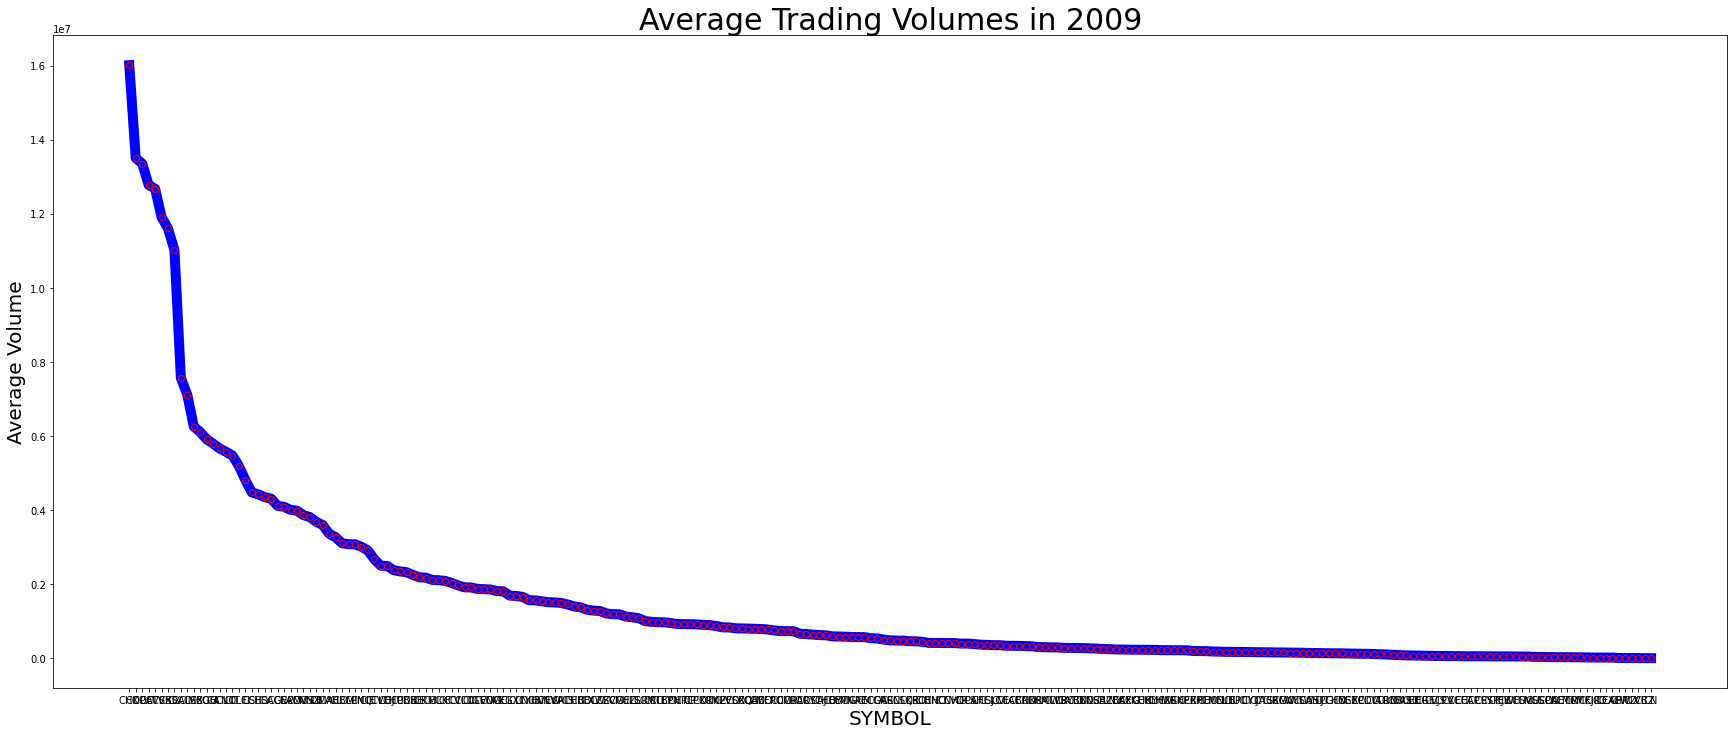

In [34]:
# Plot Average Volume of the New York Stock for the Year 2009 using matplotlib

plt.figure(figsize=(30,12))
plt.plot(PdNewYorkstock_2009.SYMBOL,PdNewYorkstock_2009.VOLUME, color='Blue',marker='o',markeredgecolor='r',linewidth=10.0)


# Define the label for the title of the figure
plt.title("Average Trading Volumes in 2009", fontsize=30)

# Define the labels for x-axis and y-axis
plt.ylabel('Average Volume', fontsize=20)
plt.xlabel('SYMBOL', fontsize=20)



plt.show()

## Daily Adjusted closing price for Top 5 companies vs Daily Adjusted closing price for Least 5 companies

### Adjusted Closing Price for Top 5 Companies in 2009

In [35]:
# filter out the top 5 companies that traded in 2009
NewYorkstock_top5 = NewYorkstockDF1_2009.filter((NewYorkstockDF1_2009["SYMBOL"] == "CHK") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "COP") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "COF") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CAT") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CVS"))
NewYorkstock_top5.show()

+------+----------+-----+-----+-----+-----+--------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE|  VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+--------+---------+
|   CAT|2009-12-31| 57.6|57.96|56.99|56.99| 3859700|     56.6|
|   CAT|2009-12-30|57.98|58.22|57.75|58.05| 3479800|    57.66|
|   CAT|2009-12-29|58.57|58.74|58.13|58.18| 2879300|    57.79|
|   CAT|2009-12-28| 58.5|58.68|58.17|58.51| 3789800|    58.11|
|   CAT|2009-12-24|58.35|58.63|58.19|58.33| 1507800|    57.93|
|   CAT|2009-12-23|58.05|58.57|57.89|58.32| 4047700|    57.92|
|   CAT|2009-12-22|57.56|57.98|57.32|57.89| 4280000|     57.5|
|   CAT|2009-12-21|57.56|57.93| 57.3| 57.6| 5339700|    57.21|
|   CAT|2009-12-18|58.07| 58.1|56.72|57.19| 7236400|     56.8|
|   CAT|2009-12-17|57.93|57.99|57.01|57.53| 5700400|    57.14|
|   CAT|2009-12-16|58.43|58.85| 58.0|58.23| 6738800|    57.84|
|   CAT|2009-12-15|58.22|58.44| 57.8| 58.2| 4950100|    57.81|
|   CAT|2009-12-14| 58.0|58.45|57.75| 58.3| 4585300|   

In [36]:
#Transposing the Top 5 companies for trend analysis
ADJ_NewYorkstock_top5 = NewYorkstock_top5.groupby('DATE').pivot('SYMBOL').max('ADJ_CLOSE').sort(asc('DATE'))
                  
ADJ_NewYorkstock_top5.show()

+----------+-----+-----+-----+-----+-----+
|      DATE|  CAT|  CHK|  COF|  COP|  CVS|
+----------+-----+-----+-----+-----+-----+
|2009-01-02|44.62|17.04|32.22|52.61|29.02|
|2009-01-05|43.83|17.89|31.96| 53.2|29.43|
|2009-01-06|43.56|18.84|33.02|53.41|28.99|
|2009-01-07|41.54|18.05|30.64|51.07|29.03|
|2009-01-08|41.87|17.38|29.92|51.78|28.98|
|2009-01-09|41.09|16.46|28.37|49.87|25.37|
|2009-01-12|39.18|15.84|26.25|48.41|24.62|
|2009-01-13|39.38|16.03|27.03|49.13|26.36|
|2009-01-14|37.43| 15.2|24.74|47.21|25.58|
|2009-01-15|37.87|15.13|24.64|46.48|25.84|
|2009-01-16|38.03|15.06|23.31|47.36| 26.5|
|2009-01-20|36.84|13.56|22.17|43.82|25.87|
|2009-01-21|38.03|14.93|22.21|47.36| 26.1|
|2009-01-22|35.79|14.01|21.22|46.13|27.08|
|2009-01-23|34.29| 14.7|18.69|46.21|27.47|
|2009-01-26|31.41|15.59|17.96|47.12|27.67|
|2009-01-27|31.07|15.43|17.31|47.49|27.33|
|2009-01-28|31.73|16.53|19.64|48.11|27.83|
|2009-01-29|30.62|16.48|16.32|45.23|27.11|
|2009-01-30|29.66| 15.6|15.32|45.59|26.63|
+----------

In [37]:
# Convert the data frame back to pandas for further analysis

Pdtop5_2009 = ADJ_NewYorkstock_top5.toPandas()
Pdtop5_2009

,DATE,CAT,CHK,COF,COP,CVS
0,2009-01-02,44.62,17.04,32.22,52.61,29.02
1,2009-01-05,43.83,17.89,31.96,53.20,29.43
2,2009-01-06,43.56,18.84,33.02,53.41,28.99
3,2009-01-07,41.54,18.05,30.64,51.07,29.03
4,2009-01-08,41.87,17.38,29.92,51.78,28.98
...,...,...,...,...,...,...
247,2009-12-24,57.93,27.75,38.83,50.87,32.06
248,2009-12-28,58.11,27.51,38.49,51.16,32.31
249,2009-12-29,57.79,26.65,38.46,50.80,32.57
250,2009-12-30,57.66,26.36,38.20,50.99,32.63


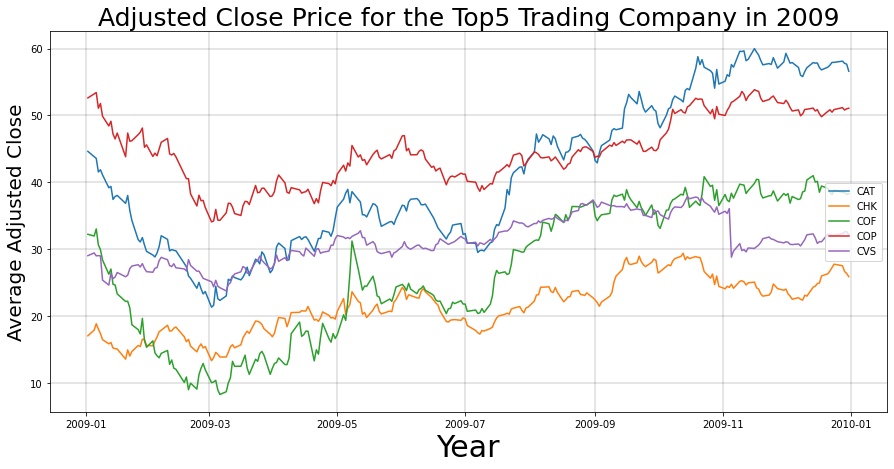

In [38]:
# Plot adjusted close price for the Top5 Trading Companing as at 2009

plt.figure(figsize=(15,7))
plt.plot(Pdtop5_2009.DATE,Pdtop5_2009['CAT'], label='CAT')
plt.plot(Pdtop5_2009.DATE,Pdtop5_2009['CHK'], label='CHK')
plt.plot(Pdtop5_2009.DATE,Pdtop5_2009['COF'], label='COF')
plt.plot(Pdtop5_2009.DATE,Pdtop5_2009['COP'], label='COP')
plt.plot(Pdtop5_2009.DATE,Pdtop5_2009['CVS'], label='CVS')


# Show the legend
plt.legend(loc=5, prop={'size': 10})


# Define the label for the title of the figure
plt.title("Adjusted Close Price for the Top5 Trading Company in 2009", fontsize=25)

# Define the labels for x-axis and y-axis
plt.ylabel('Average Adjusted Close', fontsize=20)
plt.xlabel('Year', fontsize=30)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-', linewidth=0.2)
plt.show()
plt.show()

In [39]:
import pixiedust

Pixiedust database opened successfully



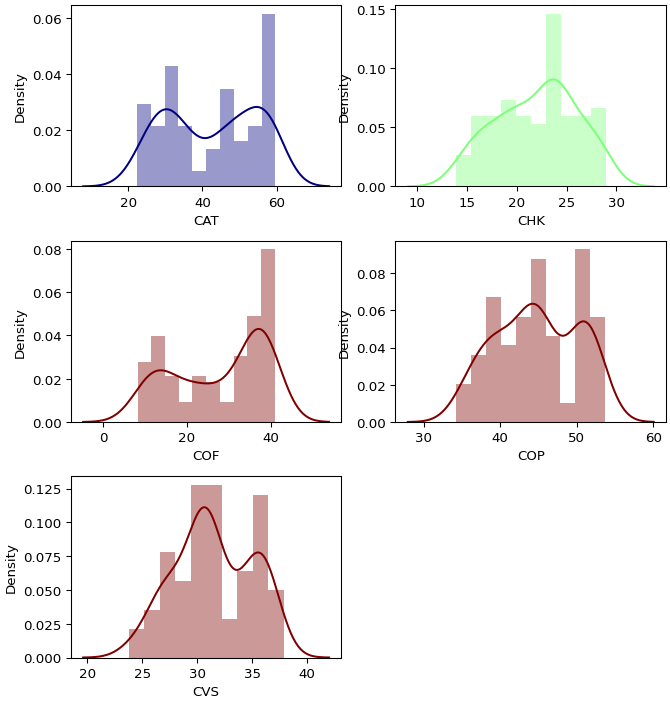

In [40]:
# Daily Adjusted Closing Price for Top five companies in 2009

display(Pdtop5_2009)

Text(0.5, 1.0, 'Boxplot of Adjusted close price for Top5')

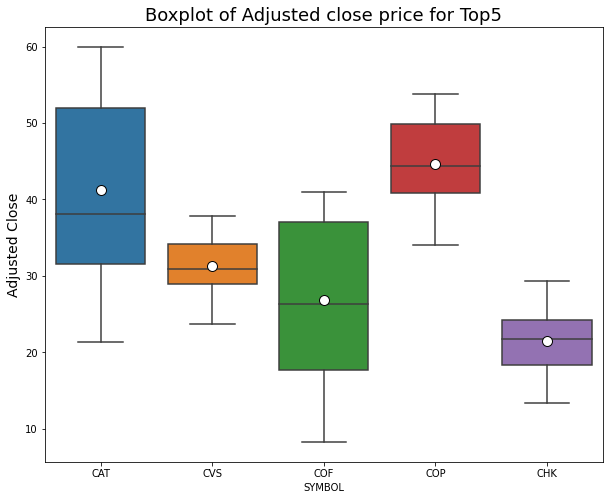

In [41]:
PD_NewYorkstock_top5 = NewYorkstock_top5.toPandas()

plt.figure(figsize=(10, 8))
sns.boxplot(x="SYMBOL",
             y="ADJ_CLOSE",
            data=PD_NewYorkstock_top5, 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Adjusted Close", size=14)

plt.title("Boxplot of Adjusted close price for Top5", size=18)



### Adjusted Closing Price for Least 5 Companies in 2009

In [42]:
# filter out the Least 5 companies that traded in 2009
NewYorkstock_Least5 = NewYorkstockDF1_2009.filter((NewYorkstockDF1_2009["SYMBOL"] == "CCZ") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CVB") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CIX") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CWZ") | \
                                                    (NewYorkstockDF1_2009["SYMBOL"] == "CPP"))
NewYorkstock_Least5.show()

+------+----------+-----+-----+-----+-----+------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE|VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+------+---------+
|   CVB|2009-12-31| 9.99| 10.1| 9.99| 10.0|  1800|     10.0|
|   CVB|2009-12-30| 9.99| 9.99| 9.95| 9.95|   700|     9.95|
|   CVB|2009-12-29|10.02|10.02|10.02|10.02|     0|    10.02|
|   CVB|2009-12-28| 9.96|10.02| 9.96|10.02|   700|    10.02|
|   CVB|2009-12-24| 10.1| 10.1| 10.1| 10.1|     0|     10.1|
|   CVB|2009-12-23|10.14|10.14| 9.99| 10.1|  1700|     10.1|
|   CVB|2009-12-22| 9.94| 9.99|  9.9| 9.94|  6500|     9.94|
|   CVB|2009-12-21| 9.94| 9.99| 9.94| 9.99|  1300|     9.99|
|   CVB|2009-12-18|10.01|10.01| 9.91| 9.91|  1600|     9.91|
|   CVB|2009-12-17| 9.97| 9.97| 9.91| 9.91|  4400|     9.91|
|   CVB|2009-12-16| 9.95| 9.95| 9.95| 9.95|     0|     9.95|
|   CVB|2009-12-15| 9.95| 9.95| 9.95| 9.95|  4000|     9.95|
|   CVB|2009-12-14|10.01|10.01| 9.95| 9.95|  2200|     9.95|
|   CVB|2009-12-11| 10.0

In [43]:
#Transposing the Least 5 companies for trend analysis
ADJ_NewYorkstock_Least5 = NewYorkstock_Least5.groupby('DATE').pivot('SYMBOL').max('ADJ_CLOSE').sort(asc('DATE'))
                  
ADJ_NewYorkstock_Least5.show()

+----------+-----+----+-----+----+-----+
|      DATE|  CCZ| CIX|  CPP| CVB|  CWZ|
+----------+-----+----+-----+----+-----+
|2009-01-02|30.74| 4.9|17.06|8.04|11.32|
|2009-01-05|25.55|4.79|17.11| 8.5|11.73|
|2009-01-06|26.06| 4.9|17.55| 8.5|12.72|
|2009-01-07|26.06|5.17| 17.7|8.17|12.68|
|2009-01-08|26.43|5.21|17.25|8.41|12.08|
|2009-01-09|26.33|5.16|17.25|8.41|12.46|
|2009-01-12|24.16| 5.2|16.98| 8.4|12.46|
|2009-01-13|24.25|5.05|16.25|8.27|12.69|
|2009-01-14|24.16|4.73|15.21|8.17|12.69|
|2009-01-15|24.07|4.64|14.71|7.97|12.51|
|2009-01-16|23.97|4.87| 14.3| 7.9|12.32|
|2009-01-20|23.97|4.83|12.89|7.99|12.16|
|2009-01-21|23.79|4.87|13.65|8.14|12.16|
|2009-01-22| 23.7|4.87| 12.9|8.13|12.23|
|2009-01-23| 23.6|4.92|13.06| 7.9|12.66|
|2009-01-26| 23.6| 5.2|13.06|8.59|11.94|
|2009-01-27| 23.6|5.38|13.18|8.73|12.24|
|2009-01-28| 23.7|5.17|14.28|8.14|10.15|
|2009-01-29| 23.7|5.18|14.04|8.05|10.06|
|2009-01-30| 23.7|5.29| 13.2|8.04|10.91|
+----------+-----+----+-----+----+-----+
only showing top

In [44]:
# Convert the data frame back to pandas for further analysis

Pdleast5_2009 = ADJ_NewYorkstock_Least5.toPandas()
Pdleast5_2009

,DATE,CCZ,CIX,CPP,CVB,CWZ
0,2009-01-02,30.74,4.90,17.06,8.04,11.32
1,2009-01-05,25.55,4.79,17.11,8.50,11.73
2,2009-01-06,26.06,4.90,17.55,8.50,12.72
3,2009-01-07,26.06,5.17,17.70,8.17,12.68
4,2009-01-08,26.43,5.21,17.25,8.41,12.08
...,...,...,...,...,...,...
247,2009-12-24,32.59,7.40,23.35,10.10,22.60
248,2009-12-28,32.59,7.20,23.88,10.02,23.26
249,2009-12-29,33.00,7.39,23.58,10.02,23.31
250,2009-12-30,32.79,7.64,23.65,9.95,23.40



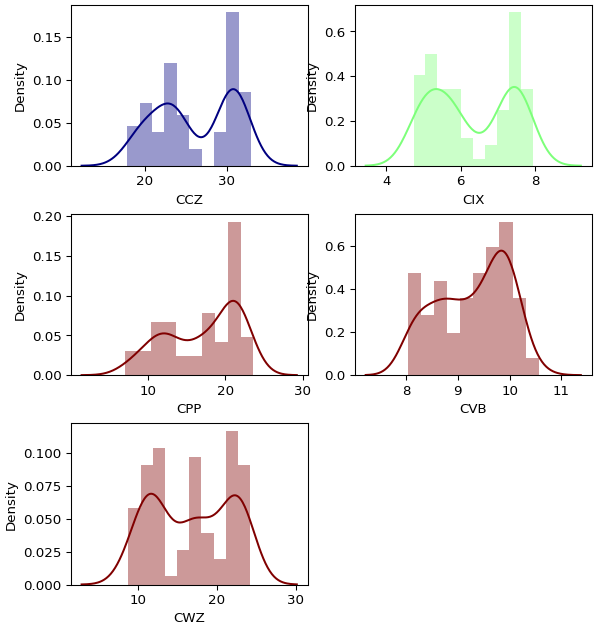

In [45]:
# Daily Adjusted Closing Price for Least five companies in 2009

display(Pdleast5_2009)

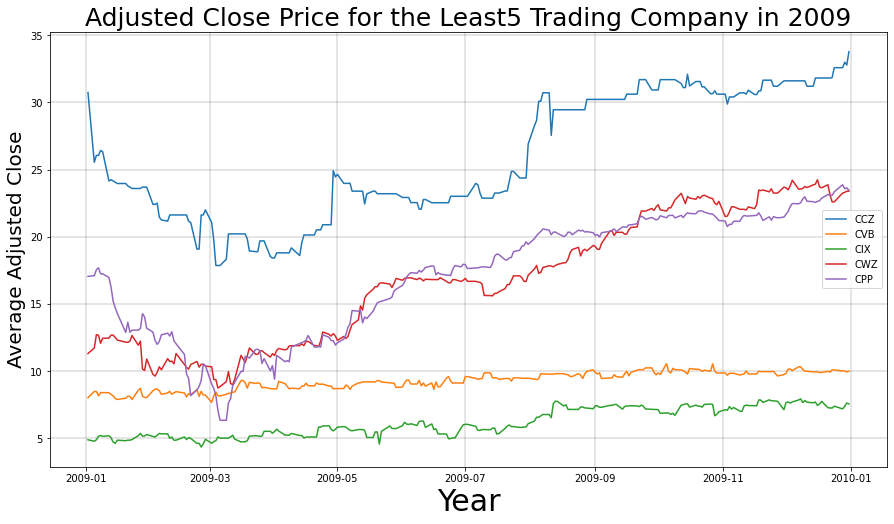

In [46]:
# Plot adjusted close price for the Least 5 Trading Companing as at 2009

plt.figure(figsize=(15,8))
plt.plot(Pdleast5_2009.DATE,Pdleast5_2009['CCZ'], label='CCZ')
plt.plot(Pdleast5_2009.DATE,Pdleast5_2009['CVB'], label='CVB')
plt.plot(Pdleast5_2009.DATE,Pdleast5_2009['CIX'], label='CIX')
plt.plot(Pdleast5_2009.DATE,Pdleast5_2009['CWZ'], label='CWZ')
plt.plot(Pdleast5_2009.DATE,Pdleast5_2009['CPP'], label='CPP')


# Show the legend
plt.legend(loc=5, prop={'size': 10})


# Define the label for the title of the figure
plt.title("Adjusted Close Price for the Least5 Trading Company in 2009", fontsize=25)

# Define the labels for x-axis and y-axis
plt.ylabel('Average Adjusted Close', fontsize=20)
plt.xlabel('Year', fontsize=30)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-', linewidth=0.2)
plt.show()
plt.show()

Text(0.5, 1.0, 'Boxplot of Adjusted close price for Least5 companies')

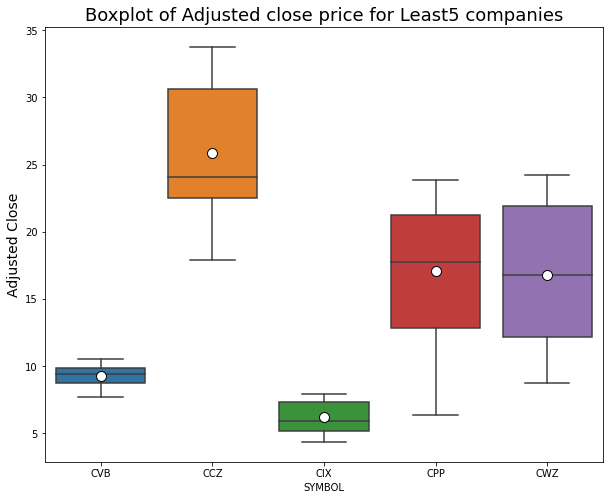

In [47]:
PD_NewYorkstock_Least5 = NewYorkstock_Least5.toPandas()

plt.figure(figsize=(10, 8))
sns.boxplot(x="SYMBOL",
             y="ADJ_CLOSE",
            data=PD_NewYorkstock_Least5, 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("Adjusted Close", size=14)

plt.title("Boxplot of Adjusted close price for Least5 companies", size=18)



# Financial Analysis of each company in Top5 and Least 5 categories

## Analysis of the Volatility of each Top Five Company

In [48]:
# filter out the CAT from top5
CAT = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CAT")

# filter out the CHK from top5
CHK = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CHK")

# filter out the COF from top5
COF = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "COF")

# filter out the COP from top5
COP = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "COP")

# filter out the CVS from top5
CVS = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CVS")

CVS.show(3)
COP.show(3)
COF.show(3)
CHK.show(3)
CAT.show(3)

+------+----------+-----+-----+-----+-----+-------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE| VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+-------+---------+
|   CVS|2009-12-31|32.61|32.76|32.19|32.21|4962600|    32.13|
|   CVS|2009-12-30|32.56| 32.8|32.45|32.71|5340000|    32.63|
|   CVS|2009-12-29|32.54|32.72|32.38|32.65|6313900|    32.57|
+------+----------+-----+-----+-----+-----+-------+---------+
only showing top 3 rows

+------+----------+-----+-----+-----+-----+-------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE| VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+-------+---------+
|   COP|2009-12-31|51.12|51.38|50.92|51.07|5975400|    51.07|
|   COP|2009-12-30|50.56| 51.0| 50.5|50.99|4425600|    50.99|
|   COP|2009-12-29|51.25|51.38|50.73| 50.8|4689500|     50.8|
+------+----------+-----+-----+-----+-----+-------+---------+
only showing top 3 rows

+------+----------+-----+-----+-----+-----+-------+---------+
|SYMBOL|      DATE| 

In [49]:
PdCAT = CAT.toPandas()
PdCHK = CHK.toPandas()
PdCOF = COF.toPandas()
PdCOP = COP.toPandas()
PdCVS = CVS.toPandas()

PdCAT.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CAT,2009-12-31,57.60,57.96,56.99,56.99,3859700,56.60
1,CAT,2009-12-30,57.98,58.22,57.75,58.05,3479800,57.66
2,CAT,2009-12-29,58.57,58.74,58.13,58.18,2879300,57.79


In [50]:
PdCHK.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CHK,2009-12-31,26.36,26.58,25.78,25.88,9759200,25.88
1,CHK,2009-12-30,26.40,26.74,26.27,26.36,8952500,26.36
2,CHK,2009-12-29,27.56,27.90,26.71,26.73,14631700,26.65


In [51]:
PdCOF.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,COF,2009-12-31,38.36,38.87,38.32,38.34,2714300,38.29
1,COF,2009-12-30,38.26,38.39,37.91,38.25,1780500,38.20
2,COF,2009-12-29,38.72,39.05,38.46,38.51,2160700,38.46


In [52]:
PdCOP.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,COP,2009-12-31,51.12,51.38,50.92,51.07,5975400,51.07
1,COP,2009-12-30,50.56,51.00,50.50,50.99,4425600,50.99
2,COP,2009-12-29,51.25,51.38,50.73,50.80,4689500,50.80


In [53]:
PdCVS.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CVS,2009-12-31,32.61,32.76,32.19,32.21,4962600,32.13
1,CVS,2009-12-30,32.56,32.80,32.45,32.71,5340000,32.63
2,CVS,2009-12-29,32.54,32.72,32.38,32.65,6313900,32.57


### Daily Percentage Change for each Top five company

In [54]:
#Analyse the Volatility of the stock for each top5 company

PdCAT['returns'] = (PdCAT['ADJ_CLOSE']/PdCAT['ADJ_CLOSE'].shift(1))-1
PdCHK['returns'] = (PdCHK['ADJ_CLOSE']/PdCHK['ADJ_CLOSE'].shift(1))-1
PdCOF['returns'] = (PdCOF['ADJ_CLOSE']/PdCOF['ADJ_CLOSE'].shift(1))-1
PdCOP['returns'] = (PdCOP['ADJ_CLOSE']/PdCOP['ADJ_CLOSE'].shift(1))-1
PdCVS['returns'] = (PdCVS['ADJ_CLOSE']/PdCVS['ADJ_CLOSE'].shift(1))-1

In [55]:
# the first line shows NaN because there is no previous valuw to compared with
PdCAT.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns
0,CAT,2009-12-31,57.60,57.96,56.99,56.99,3859700,56.60,NaN
1,CAT,2009-12-30,57.98,58.22,57.75,58.05,3479800,57.66,0.018728
2,CAT,2009-12-29,58.57,58.74,58.13,58.18,2879300,57.79,0.002255
3,CAT,2009-12-28,58.50,58.68,58.17,58.51,3789800,58.11,0.005537
4,CAT,2009-12-24,58.35,58.63,58.19,58.33,1507800,57.93,-0.003098


In [56]:
# the first line shows NaN because there is no previous valuw to compared with
PdCHK.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns
0,CHK,2009-12-31,26.36,26.58,25.78,25.88,9759200,25.88,NaN
1,CHK,2009-12-30,26.40,26.74,26.27,26.36,8952500,26.36,0.018547
2,CHK,2009-12-29,27.56,27.90,26.71,26.73,14631700,26.65,0.011002
3,CHK,2009-12-28,28.16,28.23,27.22,27.59,14839700,27.51,0.032270
4,CHK,2009-12-24,27.57,28.08,27.53,27.83,9063800,27.75,0.008724


In [57]:
# the first line shows NaN because there is no previous valuw to compared with
PdCOF.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns
0,COF,2009-12-31,38.36,38.87,38.32,38.34,2714300,38.29,NaN
1,COF,2009-12-30,38.26,38.39,37.91,38.25,1780500,38.20,-0.002350
2,COF,2009-12-29,38.72,39.05,38.46,38.51,2160700,38.46,0.006806
3,COF,2009-12-28,39.12,39.23,38.38,38.54,1893500,38.49,0.000780
4,COF,2009-12-24,38.25,39.19,38.12,38.89,1615800,38.83,0.008833


In [58]:
# the first line shows NaN because there is no previous valuw to compared with
PdCOP.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns
0,COP,2009-12-31,51.12,51.38,50.92,51.07,5975400,51.07,NaN
1,COP,2009-12-30,50.56,51.00,50.50,50.99,4425600,50.99,-0.001566
2,COP,2009-12-29,51.25,51.38,50.73,50.80,4689500,50.80,-0.003726
3,COP,2009-12-28,51.00,51.25,50.84,51.16,4030000,51.16,0.007087
4,COP,2009-12-24,50.49,50.95,50.41,50.87,2234500,50.87,-0.005668


In [59]:
# the first line shows NaN because there is no previous valuw to compared with
PdCVS.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns
0,CVS,2009-12-31,32.61,32.76,32.19,32.21,4962600,32.13,NaN
1,CVS,2009-12-30,32.56,32.80,32.45,32.71,5340000,32.63,0.015562
2,CVS,2009-12-29,32.54,32.72,32.38,32.65,6313900,32.57,-0.001839
3,CVS,2009-12-28,32.25,32.55,32.16,32.39,5454400,32.31,-0.007983
4,CVS,2009-12-24,32.06,32.24,32.05,32.14,2184900,32.06,-0.007738


Text(0.5, 1.0, 'Histogram plot of each top5 company')

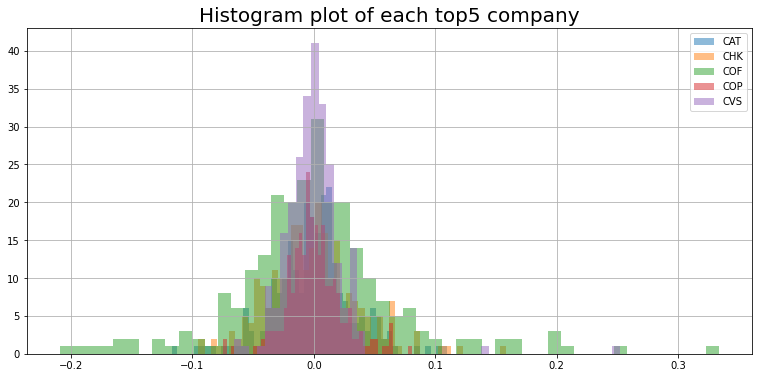

In [60]:
#the wider the plot (bell shape) the more volatile the stock
# They are similar interms of volatility

PdCAT['returns'].hist(bins=50, label = 'CAT',figsize=(13,6), alpha=0.5)
PdCHK['returns'].hist(bins=50, label = 'CHK',figsize=(13,6),alpha=0.5)
PdCOF['returns'].hist(bins=50, label = 'COF',figsize=(13,6),alpha=0.5)
PdCOP['returns'].hist(bins=50, label = 'COP',figsize=(13,6),alpha=0.5)
PdCVS['returns'].hist(bins=50, label = 'CVS',figsize=(13,6),alpha=0.5)
plt.legend()
plt.title('Histogram plot of each top5 company', fontsize=20)

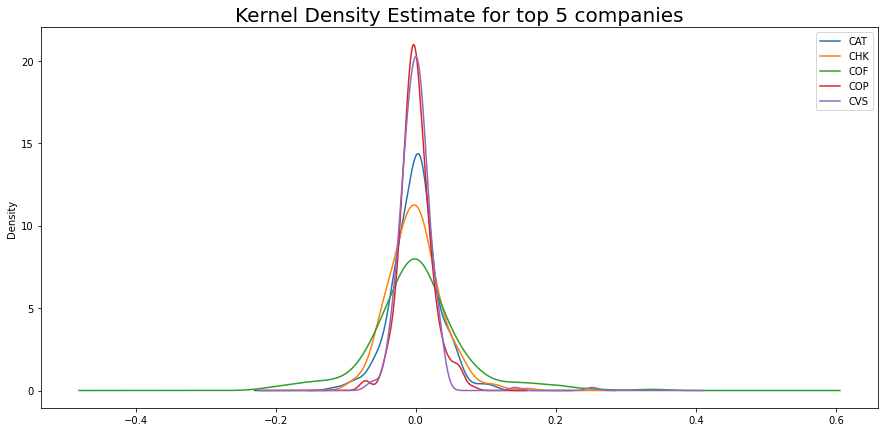

In [61]:
# use kernel density estimate plot to view the volatity deeper
# to show a normalized plot using the probability density function
PdCAT['returns'].plot(kind = 'kde', label= 'CAT',figsize=(15,7))
PdCHK['returns'].plot(kind = 'kde', label= 'CHK')
PdCOF['returns'].plot(kind = 'kde', label= 'COF')
PdCOP['returns'].plot(kind = 'kde', label= 'COP')
PdCVS['returns'].plot(kind = 'kde', label= 'CVS')
plt.title('Kernel Density Estimate for top 5 companies', fontsize=20)
plt.legend()

Boxplot showing the districutions of the top five returns

<AxesSubplot:>

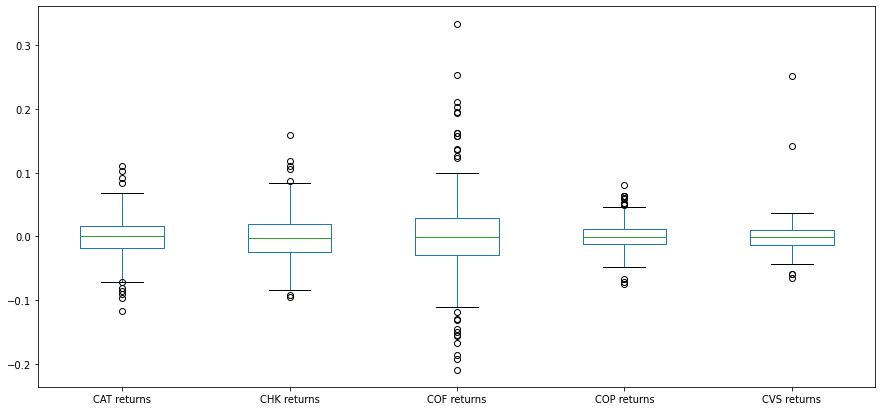

In [62]:
# Boxplot of daily returns of the company

box_df =pd.concat([PdCAT['returns'],PdCHK['returns'],PdCOF['returns'],PdCOP['returns'],PdCVS['returns']], axis = 1)
box_df.columns = ['CAT returns', 'CHK returns', 'COF returns', 'COP returns',  'CVS returns']
box_df.plot(kind ='box', figsize = (15,7))

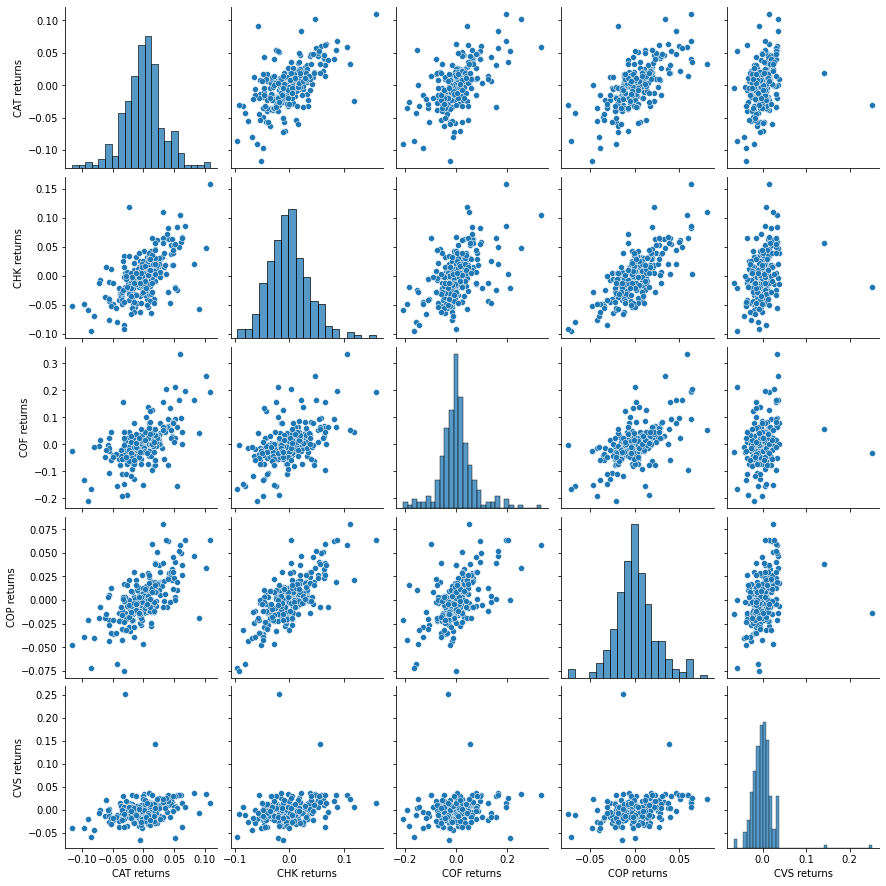

In [63]:
sns.pairplot(box_df, diag_kind="hist")

In [64]:
#the correlations between the top five companies's returns
box_df.corr()

,CAT returns,CHK returns,COF returns,COP returns,CVS returns
CAT returns,1.000000,0.587785,0.578721,0.666029,0.254066
CHK returns,0.587785,1.000000,0.509954,0.738632,0.262834
COF returns,0.578721,0.509954,1.000000,0.569525,0.194212
COP returns,0.666029,0.738632,0.569525,1.000000,0.312450
CVS returns,0.254066,0.262834,0.194212,0.312450,1.000000


<AxesSubplot:>

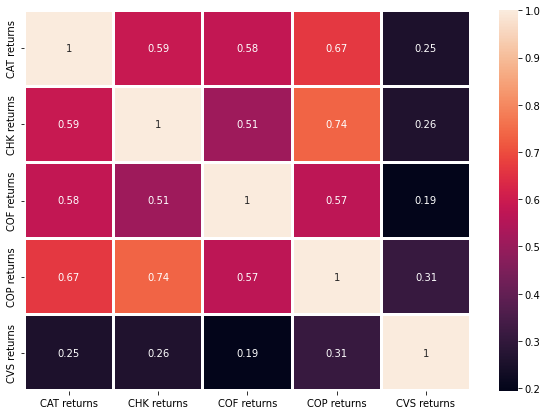

In [65]:
# Heatmap plot showing the maginitude of correletions between the least five companies return
plt.figure(figsize=(10,7))
sns.heatmap(box_df.corr(),annot=True,linewidths=2)

### Cumulative returns of each top5 company in 2009

In [66]:
#Calculate the cumulative gain/loss made by each company

PdCAT['Cummulative Returns'] = (1 + PdCAT['returns']).cumprod()
PdCHK['Cummulative Returns'] = (1 + PdCHK['returns']).cumprod()
PdCOF['Cummulative Returns'] = (1 + PdCOF['returns']).cumprod()
PdCOP['Cummulative Returns'] = (1 + PdCOP['returns']).cumprod()
PdCVS['Cummulative Returns'] = (1 + PdCVS['returns']).cumprod()

PdCAT.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CAT,2009-12-31,57.60,57.96,56.99,56.99,3859700,56.60,NaN,NaN
1,CAT,2009-12-30,57.98,58.22,57.75,58.05,3479800,57.66,0.018728,1.018728
2,CAT,2009-12-29,58.57,58.74,58.13,58.18,2879300,57.79,0.002255,1.021025


In [67]:
PdCHK.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CHK,2009-12-31,26.36,26.58,25.78,25.88,9759200,25.88,NaN,NaN
1,CHK,2009-12-30,26.40,26.74,26.27,26.36,8952500,26.36,0.018547,1.018547
2,CHK,2009-12-29,27.56,27.90,26.71,26.73,14631700,26.65,0.011002,1.029753


In [68]:
PdCOF.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,COF,2009-12-31,38.36,38.87,38.32,38.34,2714300,38.29,NaN,NaN
1,COF,2009-12-30,38.26,38.39,37.91,38.25,1780500,38.20,-0.002350,0.99765
2,COF,2009-12-29,38.72,39.05,38.46,38.51,2160700,38.46,0.006806,1.00444


In [69]:
PdCOP.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,COP,2009-12-31,51.12,51.38,50.92,51.07,5975400,51.07,NaN,NaN
1,COP,2009-12-30,50.56,51.00,50.50,50.99,4425600,50.99,-0.001566,0.998434
2,COP,2009-12-29,51.25,51.38,50.73,50.80,4689500,50.80,-0.003726,0.994713


In [70]:
PdCVS.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CVS,2009-12-31,32.61,32.76,32.19,32.21,4962600,32.13,NaN,NaN
1,CVS,2009-12-30,32.56,32.80,32.45,32.71,5340000,32.63,0.015562,1.015562
2,CVS,2009-12-29,32.54,32.72,32.38,32.65,6313900,32.57,-0.001839,1.013694


Graph of the Cummulative Returns of each top5 company in the the year 2009

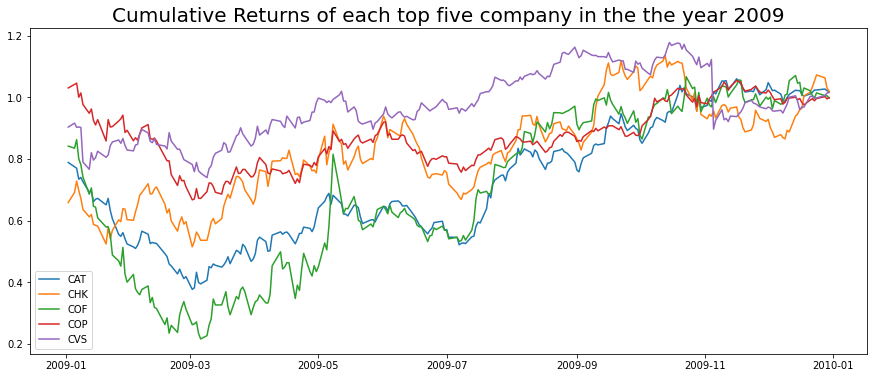

In [71]:
# graph showing the cumulative Returns of each top five company in the the year 2009

plt.figure(figsize=(15,6))

plt.plot(PdCAT.DATE,PdCAT['Cummulative Returns'], label='CAT')
plt.plot(PdCHK.DATE,PdCHK['Cummulative Returns'], label='CHK')
plt.plot(PdCOF.DATE,PdCOF['Cummulative Returns'], label='COF')
plt.plot(PdCOP.DATE,PdCOP['Cummulative Returns'], label='COP')
plt.plot(PdCVS.DATE,PdCVS['Cummulative Returns'], label='CVS')


plt.title('Cumulative Returns of each top five company in the the year 2009', fontsize =20)
plt.legend()

### Introducing Moving Average function to smoothen the curve

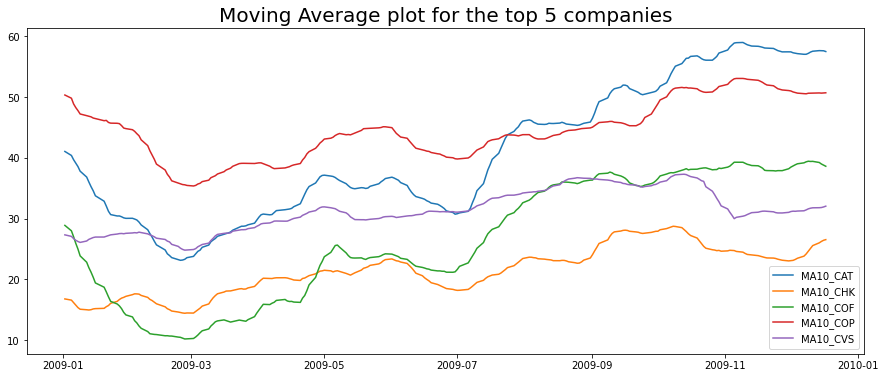

In [72]:
#moving average plot for top five companies
#size of the window for movimg average =10

plt.figure(figsize=(15,6))

PdCAT['MA10'] = PdCAT['ADJ_CLOSE'].rolling(10).mean()
PdCHK['MA10'] = PdCHK['ADJ_CLOSE'].rolling(10).mean()
PdCOF['MA10'] = PdCOF['ADJ_CLOSE'].rolling(10).mean()
PdCOP['MA10'] = PdCOP['ADJ_CLOSE'].rolling(10).mean()
PdCVS['MA10'] = PdCVS['ADJ_CLOSE'].rolling(10).mean()

#plt.plot(PdCOF.DATE,PdCOF['ADJ_CLOSE'], label='No moving average')

plt.plot(PdCAT.DATE,PdCAT['MA10'],label='MA10_CAT')
plt.plot(PdCHK.DATE,PdCHK['MA10'],label='MA10_CHK')
plt.plot(PdCOF.DATE,PdCOF['MA10'],label='MA10_COF')
plt.plot(PdCOP.DATE,PdCOP['MA10'],label='MA10_COP')
plt.plot(PdCVS.DATE,PdCVS['MA10'],label='MA10_CVS')

plt.title('Moving Average plot for the top 5 companies', fontsize=20)
plt.legend()

**Least five companies**

## Analysis of the Volatility of each Least Five Company

In [73]:
# filter out the CCZ from top5
CCZ = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CCZ")

# filter out the CVB from top5
CVB = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CVB")

# filter out the CIX from top5
CIX = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CIX")

# filter out the CWZ from top5
CWZ = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CWZ")

# filter out the CPP from top5
CPP = NewYorkstockDF1_2009.filter(NewYorkstockDF1_2009["SYMBOL"] == "CPP")

CCZ.show(3)
CVB.show(3)
CIX.show(3)
CWZ.show(3)
CPP.show(3)

+------+----------+-----+-----+-----+-----+------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE|VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+------+---------+
|   CCZ|2009-12-31|33.78|33.78|33.78|33.78|   100|    33.78|
|   CCZ|2009-12-30|32.09|32.79|32.09|32.79|   200|    32.79|
|   CCZ|2009-12-29| 33.0| 33.0| 33.0| 33.0|     0|     33.0|
+------+----------+-----+-----+-----+-----+------+---------+
only showing top 3 rows

+------+----------+-----+-----+-----+-----+------+---------+
|SYMBOL|      DATE| OPEN| HIGH|  LOW|CLOSE|VOLUME|ADJ_CLOSE|
+------+----------+-----+-----+-----+-----+------+---------+
|   CVB|2009-12-31| 9.99| 10.1| 9.99| 10.0|  1800|     10.0|
|   CVB|2009-12-30| 9.99| 9.99| 9.95| 9.95|   700|     9.95|
|   CVB|2009-12-29|10.02|10.02|10.02|10.02|     0|    10.02|
+------+----------+-----+-----+-----+-----+------+---------+
only showing top 3 rows

+------+----------+----+----+----+-----+------+---------+
|SYMBOL|      DATE|OPEN|HIGH| LOW|CLOS

In [74]:
PdCCZ = CCZ.toPandas()
PdCVB = CVB.toPandas()
PdCIX = CIX.toPandas()
PdCWZ = CWZ.toPandas()
PdCPP = CPP.toPandas()

PdCCZ.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CCZ,2009-12-31,33.78,33.78,33.78,33.78,100,33.78
1,CCZ,2009-12-30,32.09,32.79,32.09,32.79,200,32.79
2,CCZ,2009-12-29,33.00,33.00,33.00,33.00,0,33.00


In [75]:
# the first line shows NaN because there is no previous valuw to compared with
PdCVB.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CVB,2009-12-31,9.99,10.10,9.99,10.00,1800,10.00
1,CVB,2009-12-30,9.99,9.99,9.95,9.95,700,9.95
2,CVB,2009-12-29,10.02,10.02,10.02,10.02,0,10.02
3,CVB,2009-12-28,9.96,10.02,9.96,10.02,700,10.02
4,CVB,2009-12-24,10.10,10.10,10.10,10.10,0,10.10


In [76]:
# the first line shows NaN because there is no previous valuw to compared with
PdCIX.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CIX,2009-12-31,7.56,7.57,7.56,7.57,200,7.57
1,CIX,2009-12-30,7.37,7.70,7.27,7.64,9500,7.64
2,CIX,2009-12-29,7.22,7.40,7.19,7.39,4400,7.39
3,CIX,2009-12-28,7.30,7.30,6.86,7.20,2000,7.20
4,CIX,2009-12-24,7.40,7.40,7.40,7.40,400,7.40


In [77]:
# the first line shows NaN because there is no previous valuw to c0mpared with
PdCWZ.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CWZ,2009-12-31,23.40,23.40,23.18,23.40,6300,23.40
1,CWZ,2009-12-30,23.35,23.40,23.17,23.40,1400,23.40
2,CWZ,2009-12-29,23.30,23.59,23.24,23.31,7100,23.31
3,CWZ,2009-12-28,23.25,23.40,23.12,23.26,4400,23.26
4,CWZ,2009-12-24,22.60,22.60,22.60,22.60,0,22.60


In [78]:
# the first line shows NaN because there is no previous valuw to compared with
PdCPP.head()

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE
0,CPP,2009-12-31,23.45,23.47,23.19,23.47,6400,23.47
1,CPP,2009-12-30,23.54,23.78,23.39,23.65,2800,23.65
2,CPP,2009-12-29,23.70,23.70,23.25,23.58,4900,23.58
3,CPP,2009-12-28,23.36,23.88,23.36,23.88,7300,23.88
4,CPP,2009-12-24,23.04,23.50,23.04,23.35,8600,23.35


In [79]:
#Analyse the Volatility of the stock for each Least five company
PdCCZ['returns'] = (PdCCZ['ADJ_CLOSE']/PdCCZ['ADJ_CLOSE'].shift(1))-1
PdCVB['returns'] = (PdCVB['ADJ_CLOSE']/PdCVB['ADJ_CLOSE'].shift(1))-1
PdCIX['returns'] = (PdCIX['ADJ_CLOSE']/PdCIX['ADJ_CLOSE'].shift(1))-1
PdCWZ['returns'] = (PdCWZ['ADJ_CLOSE']/PdCWZ['ADJ_CLOSE'].shift(1))-1
PdCPP['returns'] = (PdCPP['ADJ_CLOSE']/PdCPP['ADJ_CLOSE'].shift(1))-1

Text(0.5, 1.0, 'Histogram plot of each Least5 company')

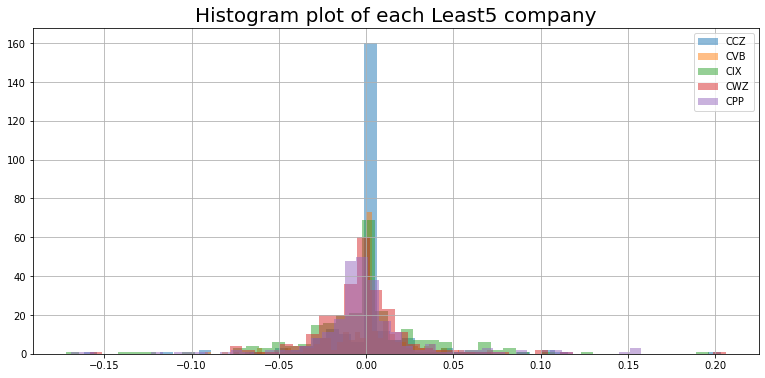

In [80]:
#the wider the plot (bell shape) the more volatile the stock
# They are similar interms of volatility

PdCCZ['returns'].hist(bins=50, label = 'CCZ',figsize=(13,6), alpha=0.5)
PdCVB['returns'].hist(bins=50, label = 'CVB',figsize=(13,6),alpha=0.5)
PdCIX['returns'].hist(bins=50, label = 'CIX',figsize=(13,6),alpha=0.5)
PdCWZ['returns'].hist(bins=50, label = 'CWZ',figsize=(13,6),alpha=0.5)
PdCPP['returns'].hist(bins=50, label = 'CPP',figsize=(13,6),alpha=0.5)
plt.legend()
plt.title('Histogram plot of each Least5 company', fontsize=20)

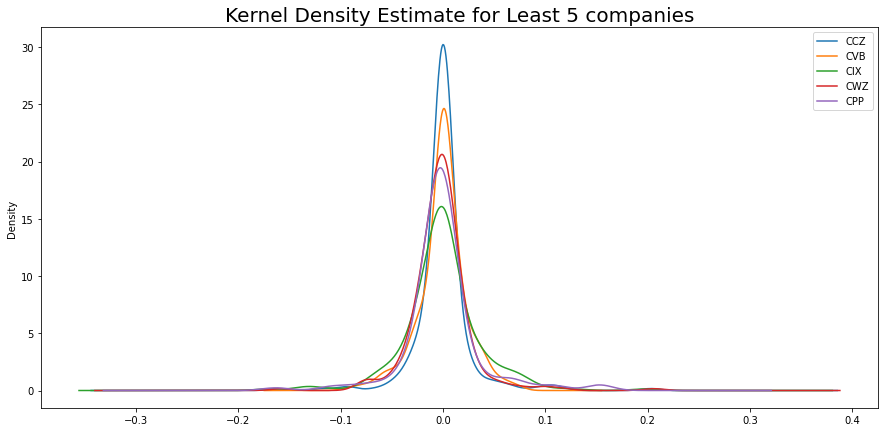

In [81]:
# use kernel density estimate plot to view the volatity deeper
# to show a normalized plot using the probability density function

PdCCZ['returns'].plot(kind = 'kde', label= 'CCZ',figsize=(15,7))
PdCVB['returns'].plot(kind = 'kde', label= 'CVB')
PdCIX['returns'].plot(kind = 'kde', label= 'CIX')
PdCWZ['returns'].plot(kind = 'kde', label= 'CWZ')
PdCPP['returns'].plot(kind = 'kde', label= 'CPP')

plt.title('Kernel Density Estimate for Least 5 companies', fontsize=20)
plt.legend()

<AxesSubplot:>

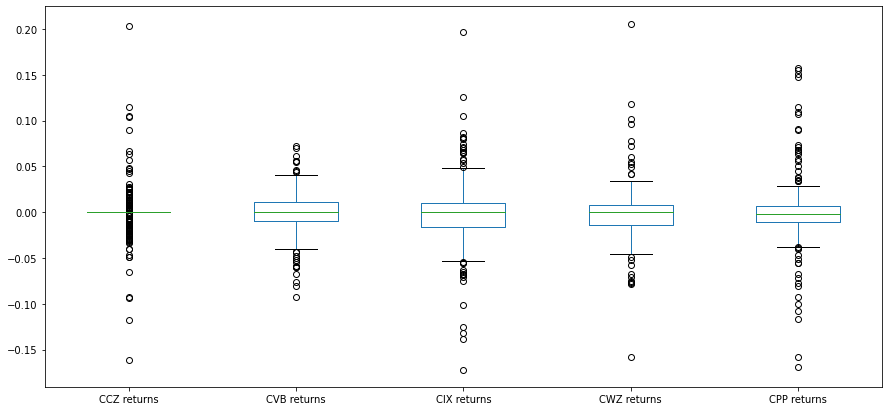

In [82]:
# Boxplot of daily returns of the least five companies

box1_df =pd.concat([PdCCZ['returns'],PdCVB['returns'],PdCIX['returns'],PdCWZ['returns'],PdCPP['returns']], axis = 1)
box1_df.columns = ['CCZ returns', 'CVB returns', 'CIX returns', 'CWZ returns',  'CPP returns']
box1_df.plot(kind ='box', figsize = (15,7))

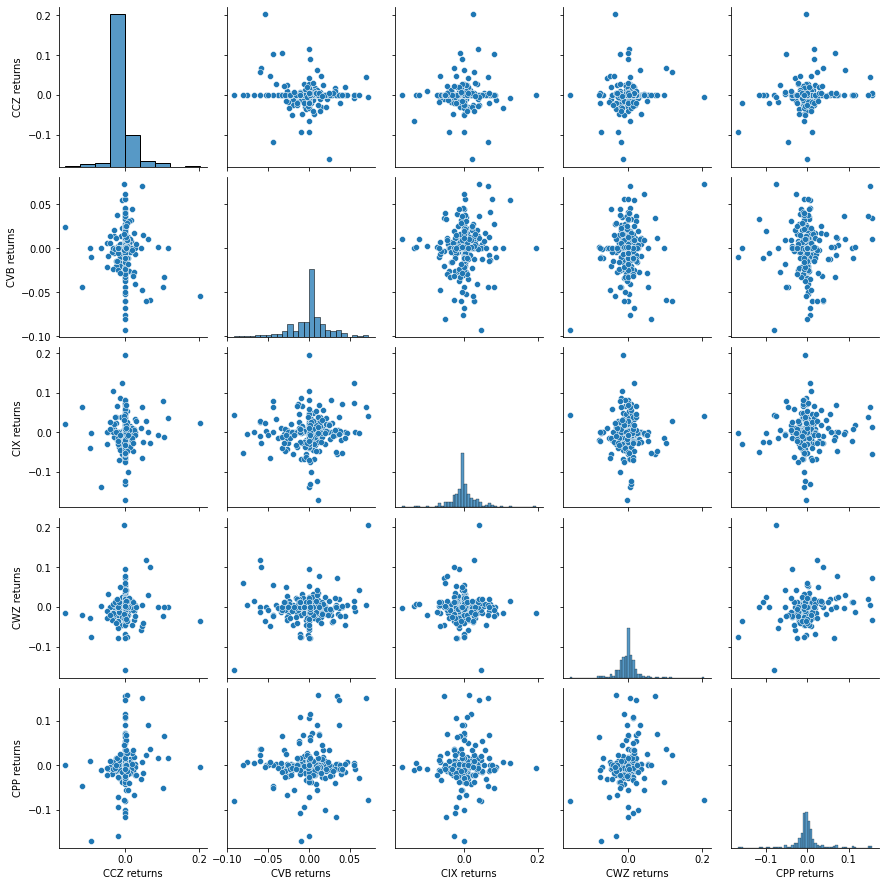

In [83]:
sns.pairplot(box1_df)

In [84]:
#the correlations between the least five companies's returns
box1_df.corr()

,CCZ returns,CVB returns,CIX returns,CWZ returns,CPP returns
CCZ returns,1.000000,-0.126788,0.039037,0.087272,0.175698
CVB returns,-0.126788,1.000000,0.082739,0.098871,0.081955
CIX returns,0.039037,0.082739,1.000000,-0.033054,0.057970
CWZ returns,0.087272,0.098871,-0.033054,1.000000,0.183154
CPP returns,0.175698,0.081955,0.057970,0.183154,1.000000


<AxesSubplot:>

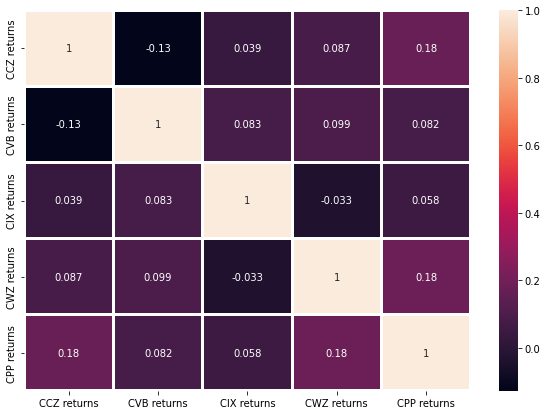

In [85]:
# Heatmap plot showing the maginitude of correletions between the least five companies return
plt.figure(figsize=(10,7))
sns.heatmap(box1_df.corr(),annot=True,linewidths=2)

### Cummulative returns of each Least 5 company in 2009

In [86]:
#Calculate the gain/loss made by each company

PdCCZ['Cummulative Returns'] = (1 + PdCCZ['returns']).cumprod()
PdCVB['Cummulative Returns'] = (1 + PdCVB['returns']).cumprod()
PdCIX['Cummulative Returns'] = (1 + PdCIX['returns']).cumprod()
PdCWZ['Cummulative Returns'] = (1 + PdCWZ['returns']).cumprod()
PdCPP['Cummulative Returns'] = (1 + PdCPP['returns']).cumprod()

PdCCZ.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CCZ,2009-12-31,33.78,33.78,33.78,33.78,100,33.78,NaN,NaN
1,CCZ,2009-12-30,32.09,32.79,32.09,32.79,200,32.79,-0.029307,0.970693
2,CCZ,2009-12-29,33.00,33.00,33.00,33.00,0,33.00,0.006404,0.976909


In [87]:
PdCVB.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CVB,2009-12-31,9.99,10.10,9.99,10.00,1800,10.00,NaN,NaN
1,CVB,2009-12-30,9.99,9.99,9.95,9.95,700,9.95,-0.005000,0.995
2,CVB,2009-12-29,10.02,10.02,10.02,10.02,0,10.02,0.007035,1.002


In [88]:
PdCIX.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CIX,2009-12-31,7.56,7.57,7.56,7.57,200,7.57,NaN,NaN
1,CIX,2009-12-30,7.37,7.70,7.27,7.64,9500,7.64,0.009247,1.009247
2,CIX,2009-12-29,7.22,7.40,7.19,7.39,4400,7.39,-0.032723,0.976222


In [89]:
PdCWZ.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CWZ,2009-12-31,23.40,23.40,23.18,23.40,6300,23.40,NaN,NaN
1,CWZ,2009-12-30,23.35,23.40,23.17,23.40,1400,23.40,0.000000,1.000000
2,CWZ,2009-12-29,23.30,23.59,23.24,23.31,7100,23.31,-0.003846,0.996154


In [90]:
PdCPP.head(3)

,SYMBOL,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_CLOSE,returns,Cummulative Returns
0,CPP,2009-12-31,23.45,23.47,23.19,23.47,6400,23.47,NaN,NaN
1,CPP,2009-12-30,23.54,23.78,23.39,23.65,2800,23.65,0.007669,1.007669
2,CPP,2009-12-29,23.70,23.70,23.25,23.58,4900,23.58,-0.002960,1.004687


Graph of the Cummulative Returns of each Least5 company in the the year 2009

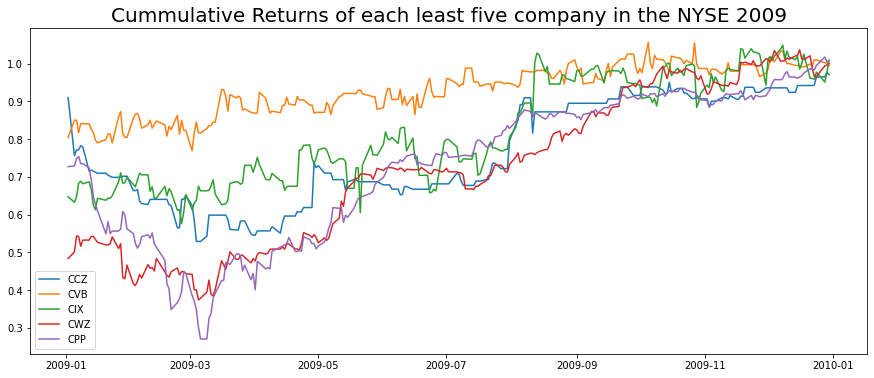

In [91]:
#cumulative returns for the least five companies

plt.figure(figsize=(15,6))
plt.plot(PdCCZ.DATE,PdCCZ['Cummulative Returns'], label='CCZ')
plt.plot(PdCVB.DATE,PdCVB['Cummulative Returns'], label='CVB')
plt.plot(PdCIX.DATE,PdCIX['Cummulative Returns'], label='CIX')
plt.plot(PdCWZ.DATE,PdCWZ['Cummulative Returns'], label='CWZ')
plt.plot(PdCPP.DATE,PdCPP['Cummulative Returns'], label='CPP')


plt.title('Cummulative Returns of each least five company in the NYSE 2009', fontsize = 20)
plt.legend()

### Introducing Moving Average function to smoothen the curve

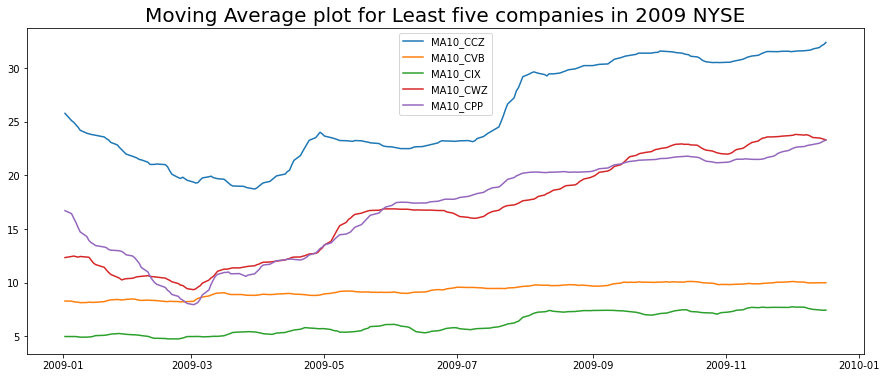

In [92]:
#size of the window for movimg average =20
plt.figure(figsize=(15,6))

PdCCZ['MA10'] = PdCCZ['ADJ_CLOSE'].rolling(10).mean()
PdCVB['MA10'] = PdCVB['ADJ_CLOSE'].rolling(10).mean()
PdCIX['MA10'] = PdCIX['ADJ_CLOSE'].rolling(10).mean()
PdCWZ['MA10'] = PdCWZ['ADJ_CLOSE'].rolling(10).mean()
PdCPP['MA10'] = PdCPP['ADJ_CLOSE'].rolling(10).mean()


plt.plot(PdCCZ.DATE,PdCCZ['MA10'],label='MA10_CCZ')
plt.plot(PdCVB.DATE,PdCVB['MA10'],label='MA10_CVB')
plt.plot(PdCIX.DATE,PdCIX['MA10'],label='MA10_CIX')
plt.plot(PdCWZ.DATE,PdCWZ['MA10'],label='MA10_CWZ')
plt.plot(PdCPP.DATE,PdCPP['MA10'],label='MA10_CPP')

plt.title('Moving Average plot for Least five companies in 2009 NYSE', fontsize = 20)
plt.legend()

# Machine Learning

In [93]:
# Recall the top 5 dataframe (NewYorkstock_top5)from above

# drop fields that is not relevant to the analysis
NYorkstock_top5 = NewYorkstock_top5.drop("SYMBOL", "DATE")

NYorkstock_top5.show()

+-----+-----+-----+-----+--------+---------+
| OPEN| HIGH|  LOW|CLOSE|  VOLUME|ADJ_CLOSE|
+-----+-----+-----+-----+--------+---------+
| 57.6|57.96|56.99|56.99| 3859700|     56.6|
|57.98|58.22|57.75|58.05| 3479800|    57.66|
|58.57|58.74|58.13|58.18| 2879300|    57.79|
| 58.5|58.68|58.17|58.51| 3789800|    58.11|
|58.35|58.63|58.19|58.33| 1507800|    57.93|
|58.05|58.57|57.89|58.32| 4047700|    57.92|
|57.56|57.98|57.32|57.89| 4280000|     57.5|
|57.56|57.93| 57.3| 57.6| 5339700|    57.21|
|58.07| 58.1|56.72|57.19| 7236400|     56.8|
|57.93|57.99|57.01|57.53| 5700400|    57.14|
|58.43|58.85| 58.0|58.23| 6738800|    57.84|
|58.22|58.44| 57.8| 58.2| 4950100|    57.81|
| 58.0|58.45|57.75| 58.3| 4585300|     57.9|
|57.24|57.65|56.64|57.51| 5364700|    57.12|
|56.91|57.27|56.51|56.94| 6303900|    56.55|
|56.36|56.59| 55.4|56.18| 8552300|     55.8|
|57.14|57.19|56.25|56.38| 6480000|     56.0|
|58.42|58.42|57.31|57.56| 6834500|    57.17|
|59.13|59.62|57.26| 58.3|10448100|     57.9|
|59.12| 60

## Regression Analysis of the 5 top companies

In [94]:
# create features array (all fields except last field that is ADJ_CLOSE)
feature_columns_top5 = NYorkstock_top5.columns[:-1] 


In [95]:
feature_columns_top5

['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']

In [96]:
from pyspark.ml.feature import VectorAssembler

# creating a features array by passing a list of features to the VectorAssembler class
#outputCol="features" -> name of output vector that combines all the values

assembler = VectorAssembler(inputCols=feature_columns_top5,outputCol="features") 

In [97]:
assembler

VectorAssembler_ce990db55126

In [98]:
# use assembler to create the features column

data = assembler.transform(NYorkstock_top5)

data.show()

+-----+-----+-----+-----+--------+---------+--------------------+
| OPEN| HIGH|  LOW|CLOSE|  VOLUME|ADJ_CLOSE|            features|
+-----+-----+-----+-----+--------+---------+--------------------+
| 57.6|57.96|56.99|56.99| 3859700|     56.6|[57.6,57.96,56.99...|
|57.98|58.22|57.75|58.05| 3479800|    57.66|[57.98,58.22,57.7...|
|58.57|58.74|58.13|58.18| 2879300|    57.79|[58.57,58.74,58.1...|
| 58.5|58.68|58.17|58.51| 3789800|    58.11|[58.5,58.68,58.17...|
|58.35|58.63|58.19|58.33| 1507800|    57.93|[58.35,58.63,58.1...|
|58.05|58.57|57.89|58.32| 4047700|    57.92|[58.05,58.57,57.8...|
|57.56|57.98|57.32|57.89| 4280000|     57.5|[57.56,57.98,57.3...|
|57.56|57.93| 57.3| 57.6| 5339700|    57.21|[57.56,57.93,57.3...|
|58.07| 58.1|56.72|57.19| 7236400|     56.8|[58.07,58.1,56.72...|
|57.93|57.99|57.01|57.53| 5700400|    57.14|[57.93,57.99,57.0...|
|58.43|58.85| 58.0|58.23| 6738800|    57.84|[58.43,58.85,58.0...|
|58.22|58.44| 57.8| 58.2| 4950100|    57.81|[58.22,58.44,57.8...|
| 58.0|58.

### Randomly Split data for the top 5 companies into train and test set

In [99]:
#split data into training and testing data
 train, test = data.randomSplit([0.7,0.3])

In [100]:
# declare the Linear Regression algorithm and specify features columns name and the labels column name
algorithm_top5 = LinearRegression(featuresCol="features", labelCol="ADJ_CLOSE")

In [101]:
# Training the model using fit method
LinearRegressionModel = algorithm_top5.fit(train)

In [102]:
# make predictions using the model
predictions_top5 = LinearRegressionModel.transform(test)

In [103]:
# dataframe that contains the original columns, the features column and the prediction column generated by the model
predictions_top5

DataFrame[OPEN: double, HIGH: double, LOW: double, CLOSE: double, VOLUME: bigint, ADJ_CLOSE: double, features: vector, prediction: double]

In [104]:
predictions_top5.show()

+-----+-----+-----+-----+--------+---------+--------------------+------------------+
| OPEN| HIGH|  LOW|CLOSE|  VOLUME|ADJ_CLOSE|            features|        prediction|
+-----+-----+-----+-----+--------+---------+--------------------+------------------+
|22.65|23.29|21.71|22.47|22397200|     21.6|[22.65,23.29,21.7...|22.111646485851374|
|23.75|25.23| 23.5|24.61|16872900|    23.66|[23.75,25.23,23.5...| 24.21706452611566|
| 23.9|24.91|22.52|23.23|19993500|    22.33|[23.9,24.91,22.52...| 22.65830839602948|
|24.29|25.05|23.98|24.92|15470500|    24.69|[24.29,25.05,23.9...|24.678467669813976|
|25.23| 26.2| 25.0|26.12| 9052400|    25.87|[25.23,26.2,25.0,...|25.843569453927874|
|25.56|25.65| 24.6|25.36|16766900|    25.12|[25.56,25.65,24.6...| 25.09217658456167|
|25.74|26.17|25.57|25.74|12769400|     25.5|[25.74,26.17,25.5...|  25.6064059008924|
|25.77| 27.7|25.75|27.34|17449300|    27.08|[25.77,27.7,25.75...|26.860833179626542|
|25.99|25.99| 24.6|24.93|21745300|    24.62|[25.99,25.99,24.6...|

In [105]:
#Select the last three columns (Label, features and prediction)
predictions_top5.select(predictions_top5.columns[5:]).show()

+---------+--------------------+------------------+
|ADJ_CLOSE|            features|        prediction|
+---------+--------------------+------------------+
|     21.6|[22.65,23.29,21.7...|22.111646485851374|
|    23.66|[23.75,25.23,23.5...| 24.21706452611566|
|    22.33|[23.9,24.91,22.52...| 22.65830839602948|
|    24.69|[24.29,25.05,23.9...|24.678467669813976|
|    25.87|[25.23,26.2,25.0,...|25.843569453927874|
|    25.12|[25.56,25.65,24.6...| 25.09217658456167|
|     25.5|[25.74,26.17,25.5...|  25.6064059008924|
|    27.08|[25.77,27.7,25.75...|26.860833179626542|
|    24.62|[25.99,25.99,24.6...|24.565174867276976|
|    25.58|[26.13,26.69,25.8...|25.672848944447065|
|     25.8|[26.51,26.85,25.6...| 26.51778453671719|
|    26.61|[26.77,27.5,26.56...|26.635118206828416|
|    25.87|[26.8,26.84,26.03...|25.977615211634863|
|     27.4|[26.84,27.66,26.7...|27.428111234388254|
|    27.47|[26.86,28.24,26.6...|27.312253559994858|
|     25.3|[26.97,27.13,25.6...| 25.91857278305413|
|    25.37|[


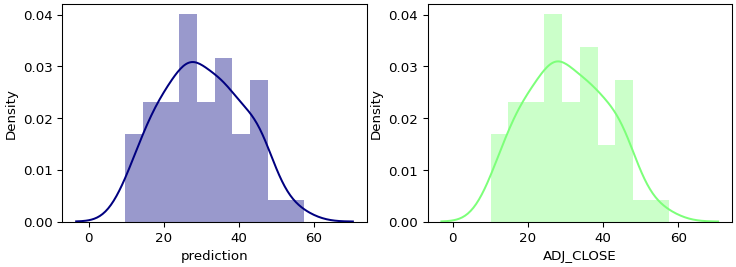

In [106]:
# Top5 Companies Adjusted Close Price Predicted vs Actual (histogram)

display(predictions_top5)


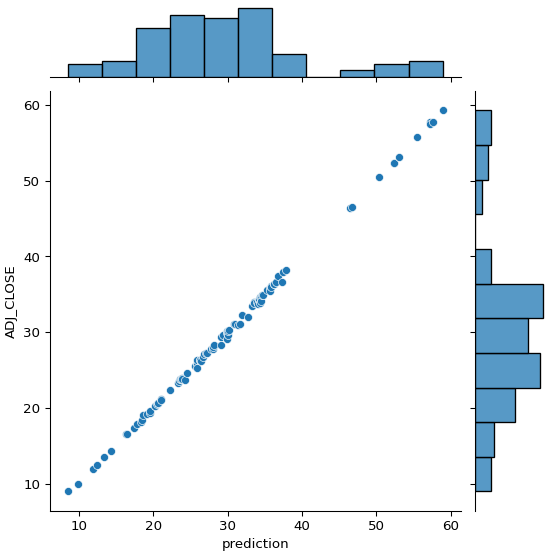

In [107]:
# Adjustment Close Price for the Top5 Companies predicted vs Actual (correlation)

display(predictions_top5)

In [108]:
# Adjustment Close Price for the Top5 Companies predicted vs Actual

display(predictions_top5)

In [109]:
# evalaute the model
# https://spark.apache.org/docs/1.6.2/api/java/org/apache/spark/ml/evaluation/RegressionEvaluator.html

from pyspark.ml.evaluation import RegressionEvaluator

**R-square of the model fit**

In [110]:
# Mean Absolute Error (R2)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="r2")

r2 = evaluator.evaluate(predictions_top5)
print(" Mean Absolute Error (R-square) value of this fit = %g" % r2)

 Mean Absolute Error (R-square) value of this fit = 0.998681


**Mean Squared Error (MSE) on test data**

In [111]:
# Mean Squared Error (MSE)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="mse")

mse = evaluator.evaluate(predictions_top5)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

 Mean Squared Error (MSE) on test data = 0.168364


**Root Mean Squared Error (MSE) on test data**

In [112]:
#Root Mean Squared Error (RMSE)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions_top5)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.410322


In [113]:
# Summarize the model over the training set and print out some metrics

summary = LinearRegressionModel.summary

summary.coefficientStandardErrors

[0.035626769611392786,
 0.040606375269852855,
 0.03925546144318304,
 0.03697003266890373,
 1.7309904891237417e-09,
 0.05525975654645972]

**Scatter plot of predicted ADJ_CLOSE and Predicted Adjusted close to see if the data fall on a 45 degree straight line**

<Figure size 864x504 with 0 Axes>

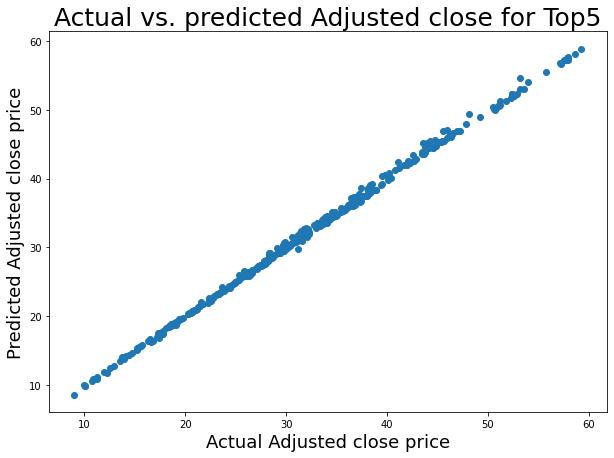

<Figure size 864x504 with 0 Axes>

In [114]:
# Actual Adjusted closing price vs Predicted Adjusted closing price for the Top 5 Trading Companing as at 2009
# Scatter plot of predicted ADJ_CLOSE and Predicted Adjusted close to see if the data fall on a 45 degree straight line

pdpredictions_top5 = predictions_top5.toPandas()


plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Adjusted close for Top5",fontsize=25)
plt.xlabel("Actual Adjusted close price",fontsize=18)
plt.ylabel("Predicted Adjusted close price", fontsize=18)
plt.scatter(x=pdpredictions_top5.ADJ_CLOSE,y=pdpredictions_top5.prediction)
plt.figure(figsize=(12,7))

**Plotting histogram of the residuals i.e. predicted errors (expected a normally distributed pattern but got something close to normal distribution)**

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of residuals to check for normality for top 5'}, xlabel='Residuals', ylabel='Kernel density'>

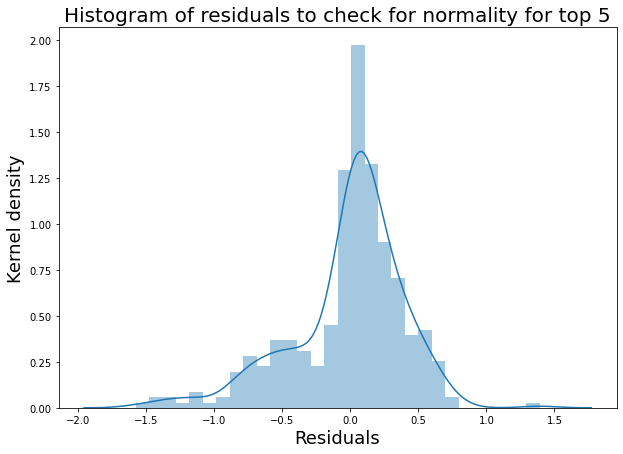

In [115]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality for top 5",fontsize=20)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([pdpredictions_top5.ADJ_CLOSE-pdpredictions_top5.prediction])

## Regression Analysis of the 5 least companies

In [116]:
# Recall the least 5 dataframe (NewYorkstock_Least5) from above

# drop fields that is not relevant to the analysis
NYorkstock_Least5 = NewYorkstock_Least5.drop("SYMBOL", "DATE")



NYorkstock_Least5.show()

+-----+-----+-----+-----+------+---------+
| OPEN| HIGH|  LOW|CLOSE|VOLUME|ADJ_CLOSE|
+-----+-----+-----+-----+------+---------+
| 9.99| 10.1| 9.99| 10.0|  1800|     10.0|
| 9.99| 9.99| 9.95| 9.95|   700|     9.95|
|10.02|10.02|10.02|10.02|     0|    10.02|
| 9.96|10.02| 9.96|10.02|   700|    10.02|
| 10.1| 10.1| 10.1| 10.1|     0|     10.1|
|10.14|10.14| 9.99| 10.1|  1700|     10.1|
| 9.94| 9.99|  9.9| 9.94|  6500|     9.94|
| 9.94| 9.99| 9.94| 9.99|  1300|     9.99|
|10.01|10.01| 9.91| 9.91|  1600|     9.91|
| 9.97| 9.97| 9.91| 9.91|  4400|     9.91|
| 9.95| 9.95| 9.95| 9.95|     0|     9.95|
| 9.95| 9.95| 9.95| 9.95|  4000|     9.95|
|10.01|10.01| 9.95| 9.95|  2200|     9.95|
| 10.0| 10.0| 10.0| 10.0|     0|     10.0|
| 10.0|10.03| 10.0| 10.0|  3900|     10.0|
|10.15|10.15|10.12|10.12|   400|    10.12|
|10.33|10.33|10.33|10.33|     0|    10.33|
| 10.3|10.33| 10.1|10.33|  1500|    10.33|
|10.05|10.05| 10.0|10.05|  3000|    10.05|
|10.16|10.16|10.16|10.16|     0|    10.16|
+-----+----

In [117]:
# create features array (all fields except last field that is ADJ_CLOSE)
feature_columns_Least5 = NYorkstock_Least5.columns[:-1] 

feature_columns_Least5

['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']

In [118]:
from pyspark.ml.feature import VectorAssembler

# creating a features array by passing a list of features to the VectorAssembler class
#outputCol="features" -> name of output vector that combines all the values
assembler1 = VectorAssembler(inputCols=feature_columns_Least5,outputCol="features1") 

assembler1

VectorAssembler_39b8d8faa6ab

In [119]:
# use assembler to create the features column

data1 = assembler1.transform(NYorkstock_Least5)

data1.show()

+-----+-----+-----+-----+------+---------+--------------------+
| OPEN| HIGH|  LOW|CLOSE|VOLUME|ADJ_CLOSE|           features1|
+-----+-----+-----+-----+------+---------+--------------------+
| 9.99| 10.1| 9.99| 10.0|  1800|     10.0|[9.99,10.1,9.99,1...|
| 9.99| 9.99| 9.95| 9.95|   700|     9.95|[9.99,9.99,9.95,9...|
|10.02|10.02|10.02|10.02|     0|    10.02|[10.02,10.02,10.0...|
| 9.96|10.02| 9.96|10.02|   700|    10.02|[9.96,10.02,9.96,...|
| 10.1| 10.1| 10.1| 10.1|     0|     10.1|[10.1,10.1,10.1,1...|
|10.14|10.14| 9.99| 10.1|  1700|     10.1|[10.14,10.14,9.99...|
| 9.94| 9.99|  9.9| 9.94|  6500|     9.94|[9.94,9.99,9.9,9....|
| 9.94| 9.99| 9.94| 9.99|  1300|     9.99|[9.94,9.99,9.94,9...|
|10.01|10.01| 9.91| 9.91|  1600|     9.91|[10.01,10.01,9.91...|
| 9.97| 9.97| 9.91| 9.91|  4400|     9.91|[9.97,9.97,9.91,9...|
| 9.95| 9.95| 9.95| 9.95|     0|     9.95|[9.95,9.95,9.95,9...|
| 9.95| 9.95| 9.95| 9.95|  4000|     9.95|[9.95,9.95,9.95,9...|
|10.01|10.01| 9.95| 9.95|  2200|     9.9

### Randomly Split data for the Least 5 companies into train and test set

In [120]:
#split data into training and testing data
 train, test = data1.randomSplit([0.7,0.3])

In [121]:
# Linear Regression algorithm and specify features columns name and the labels column name
algorithm_Least5 = LinearRegression(featuresCol="features1", labelCol="ADJ_CLOSE")

In [122]:
# Training the model using fit method
LinearRegModel = algorithm_Least5.fit(train)

In [123]:
# make predictions using the model
predictions_Least5 = LinearRegModel.transform(test)

In [124]:
# dataframe that contains the original columns, the features column and the prediction column generated by the model
predictions_Least5

DataFrame[OPEN: double, HIGH: double, LOW: double, CLOSE: double, VOLUME: bigint, ADJ_CLOSE: double, features1: vector, prediction: double]

In [125]:
#Select the last three columns (Label, features1 and prediction)

predictions_Least5.select(predictions_Least5.columns[5:]).show()

+---------+--------------------+------------------+
|ADJ_CLOSE|           features1|        prediction|
+---------+--------------------+------------------+
|     4.75|[5.0,5.0,5.0,5.0,...|4.6280077549673235|
|     4.64|[5.0,5.19,5.0,5.0...| 4.672970639094792|
|     4.76|[5.01,5.01,5.01,5...| 4.635182369986542|
|     5.02|[5.18,5.18,5.18,5...| 4.804383047286763|
|     5.02|[5.18,5.29,5.18,5...| 4.885608573105587|
|     5.17|[5.19,5.45,5.19,5...|5.0224858668913654|
|     4.87|[5.24,5.25,5.24,5...|  4.86860286818393|
|     4.63|[5.25,5.25,4.37,4...| 4.249604447405951|
|     4.87|[5.25,5.25,5.25,5...| 4.871399031345206|
|     5.17|[5.28,5.72,5.16,5...| 5.127726265000313|
|     4.92|[5.29,5.34,5.2,5....| 4.903881248804414|
|     5.07|[5.3,5.46,5.29,5....|4.9575377475091065|
|     4.99|[5.33,5.33,5.13,5...| 4.713534593945374|
|     5.11|[5.38,5.38,5.38,5...| 4.997206779510128|
|     5.33|[5.41,5.99,5.3,5....| 5.082282110891404|
|     5.06|[5.44,5.45,5.44,5...| 5.065100217671902|
|     5.22|[


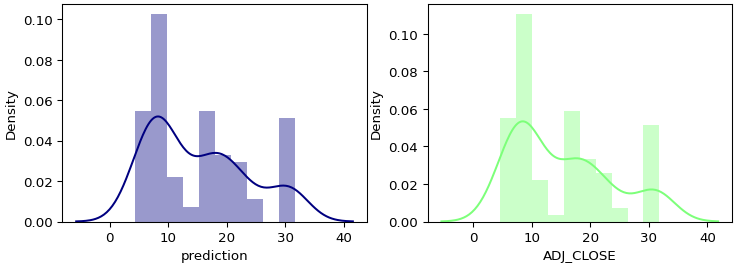

In [126]:
# Least5 Companies Adjusted Close Price Predicted vs Actual

display(predictions_Least5)


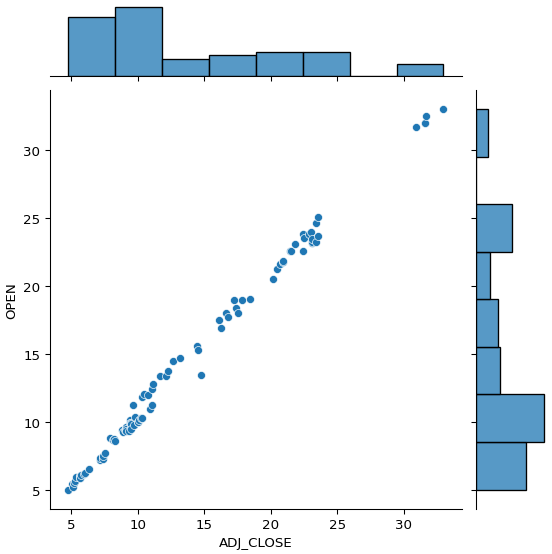

In [127]:
# Adjustment Close Price for the Least5 Companies predicted vs Actual

display(predictions_Least5)

In [128]:
# predicted Adjustment Close Price for the Least5 Companies vs Actual

display(predictions_Least5)

**R-square of the model fit**

In [129]:
# Mean Absolute Error (R2)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="r2")

r2 = evaluator.evaluate(predictions_Least5)
print(" Mean Absolute Error (R-square) of the model fit = %g" % r2)

 Mean Absolute Error (R-square) of the model fit = 0.996659


**Mean Squared Error (MSE) on test data**

In [130]:
# Mean Squared Error (MSE)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="mse")

mse = evaluator.evaluate(predictions_Least5)
print(" Mean Squared Error (MSE) on test data = %g" % mse)

 Mean Squared Error (MSE) on test data = 0.207414


**Root Mean Squared Error (MSE) on test data**

In [131]:
#Root Mean Squared Error (RMSE)

evaluator = RegressionEvaluator(
    labelCol="ADJ_CLOSE", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions_top5)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.410322


In [132]:
# Summarize the model over the training set and print out some metrics

summary1 = LinearRegressionModel.summary

summary1.coefficientStandardErrors

[0.035626769611392786,
 0.040606375269852855,
 0.03925546144318304,
 0.03697003266890373,
 1.7309904891237417e-09,
 0.05525975654645972]

**Scatter plot of predicted ADJ_CLOSE and Predicted Adjusted close to see if the data fall on a 45 degree straight line**

<Figure size 864x504 with 0 Axes>

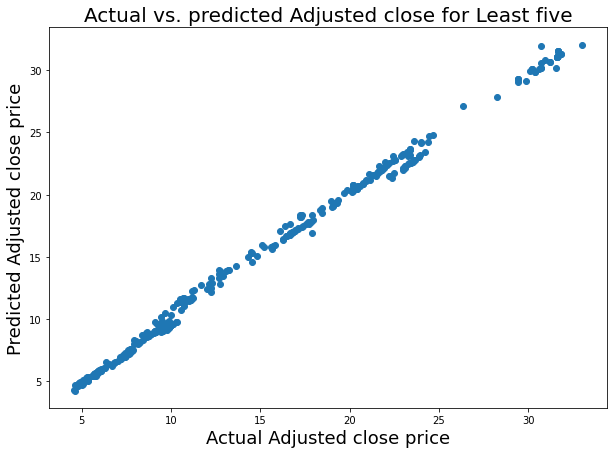

<Figure size 864x504 with 0 Axes>

In [133]:
# Plot adjusted close price for the Least 5 Trading Companing as at 2009
#Scatter plot of predicted ADJ_CLOSE and Predicted Adjusted close to see if the data fall on a 45 degree straight line

pdpredictions_Least5 = predictions_Least5.toPandas()


plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Adjusted close for Least five",fontsize=20)
plt.xlabel("Actual Adjusted close price",fontsize=18)
plt.ylabel("Predicted Adjusted close price", fontsize=18)
plt.scatter(x=pdpredictions_Least5.ADJ_CLOSE,y=pdpredictions_Least5.prediction)
plt.figure(figsize=(12,7))

**Plotting histogram of the residuals i.e. predicted errors (expected a normally distributed pattern (perfect bell-shaped curve) but got something close to normal distribution)**

/usr/local/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Histogram of residuals to check for normality for Least 5'}, xlabel='Residuals', ylabel='Kernel density'>

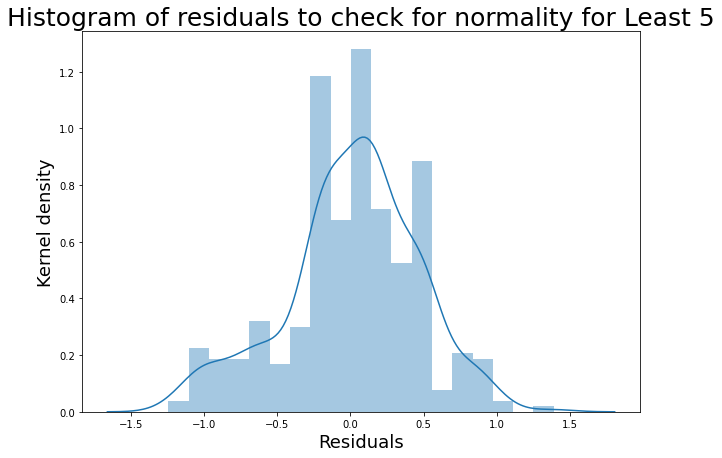

In [134]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality for Least 5",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([pdpredictions_Least5.ADJ_CLOSE-pdpredictions_Least5.prediction])